In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [2]:
df=pd.read_csv('dataset_target.csv',index_col=0)

In [3]:
df.columns


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

<AxesSubplot:xlabel='Date'>

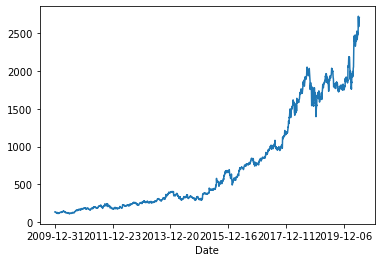

In [4]:
df['High'].plot()

<AxesSubplot:xlabel='Date'>

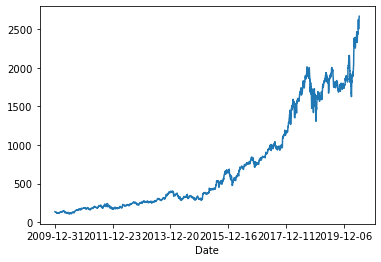

In [5]:
df['Low'].plot()

<AxesSubplot:xlabel='Date'>

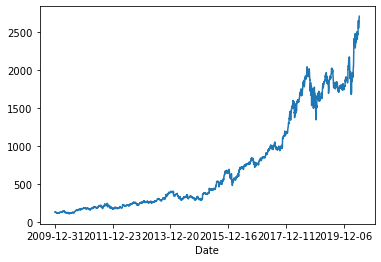

In [6]:
df['Adj Close'].plot()

In [7]:
df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()

<AxesSubplot:xlabel='Date'>

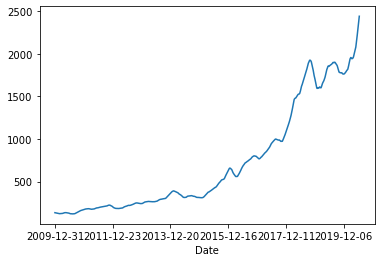

In [8]:
df['Moving_av'].plot()

In [9]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]


while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close  

<AxesSubplot:xlabel='Date'>

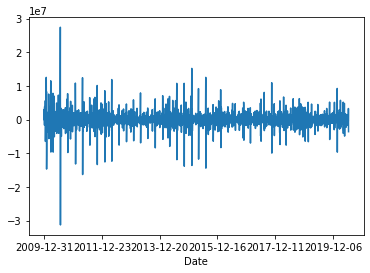

In [10]:
df['Increase_in_vol'].plot()

<AxesSubplot:xlabel='Date'>

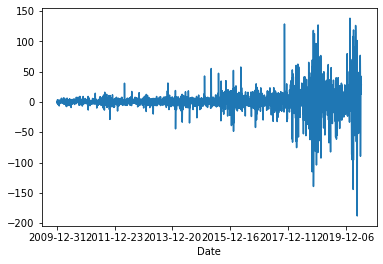

In [11]:
df['Increase_in_adj_close'].plot()

In [12]:
df.to_csv("dataset_target_2.csv",index=False)

In [13]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close'],
      dtype='object')

In [14]:
df=pd.read_csv('stock_details/AMZN.csv')

In [15]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [16]:
Dates=[]
i=0
while i<len(df):
		Dates.append(df.iloc[i]['Date'])
		i+=1

In [17]:
df2=pd.read_csv('dataset_target_2.csv')
df2['Date']=Dates
df2.to_csv("dataset_target_2.csv",index=False)

In [18]:
df=pd.read_csv('Dataset_main.csv')

In [19]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)

In [20]:
!pip install mpl_finance


In [21]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=pd.read_csv('stock_details/AMZN.csv',index_col=0,parse_dates=True)

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


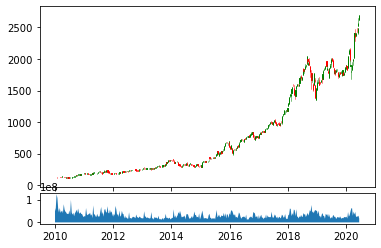

In [22]:
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)



ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

In [23]:
df1=pd.read_csv('dataset_target.csv')
col1=df1.columns
print(col1)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [24]:
df2=pd.read_csv('dataset_target_2.csv')
col2=df2.columns
print(col2)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'Date'],
      dtype='object')


In [25]:
df3=pd.read_csv('Dataset_main.csv')
col3=df3.columns
print(col3)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)


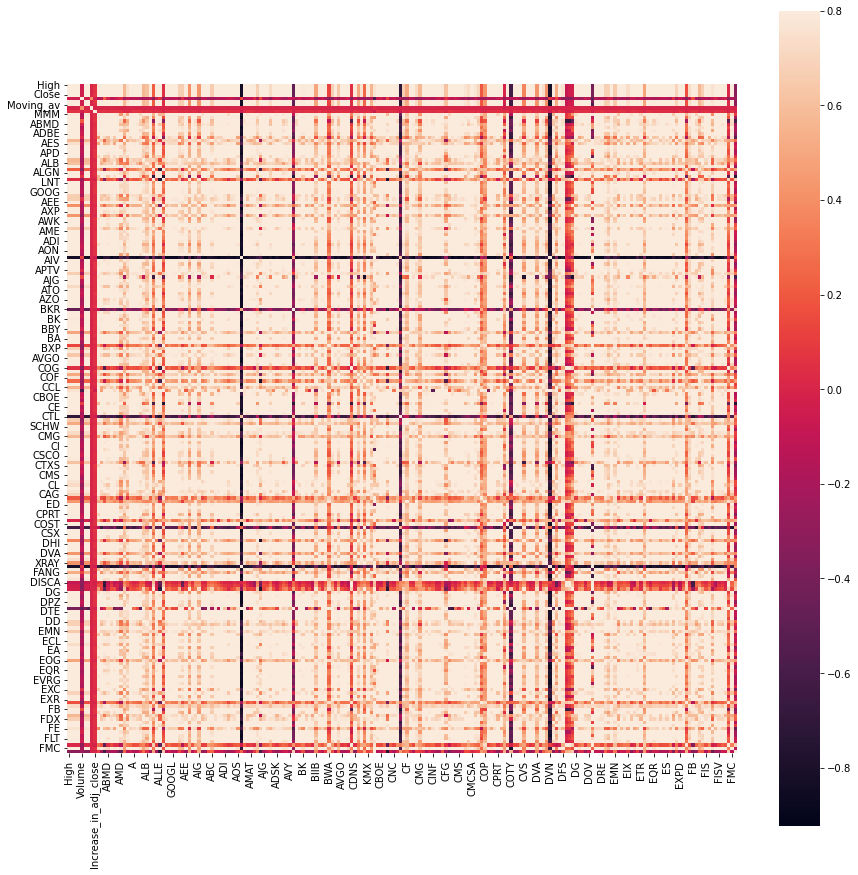

In [26]:
import seaborn as sb
C_mat = df3.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

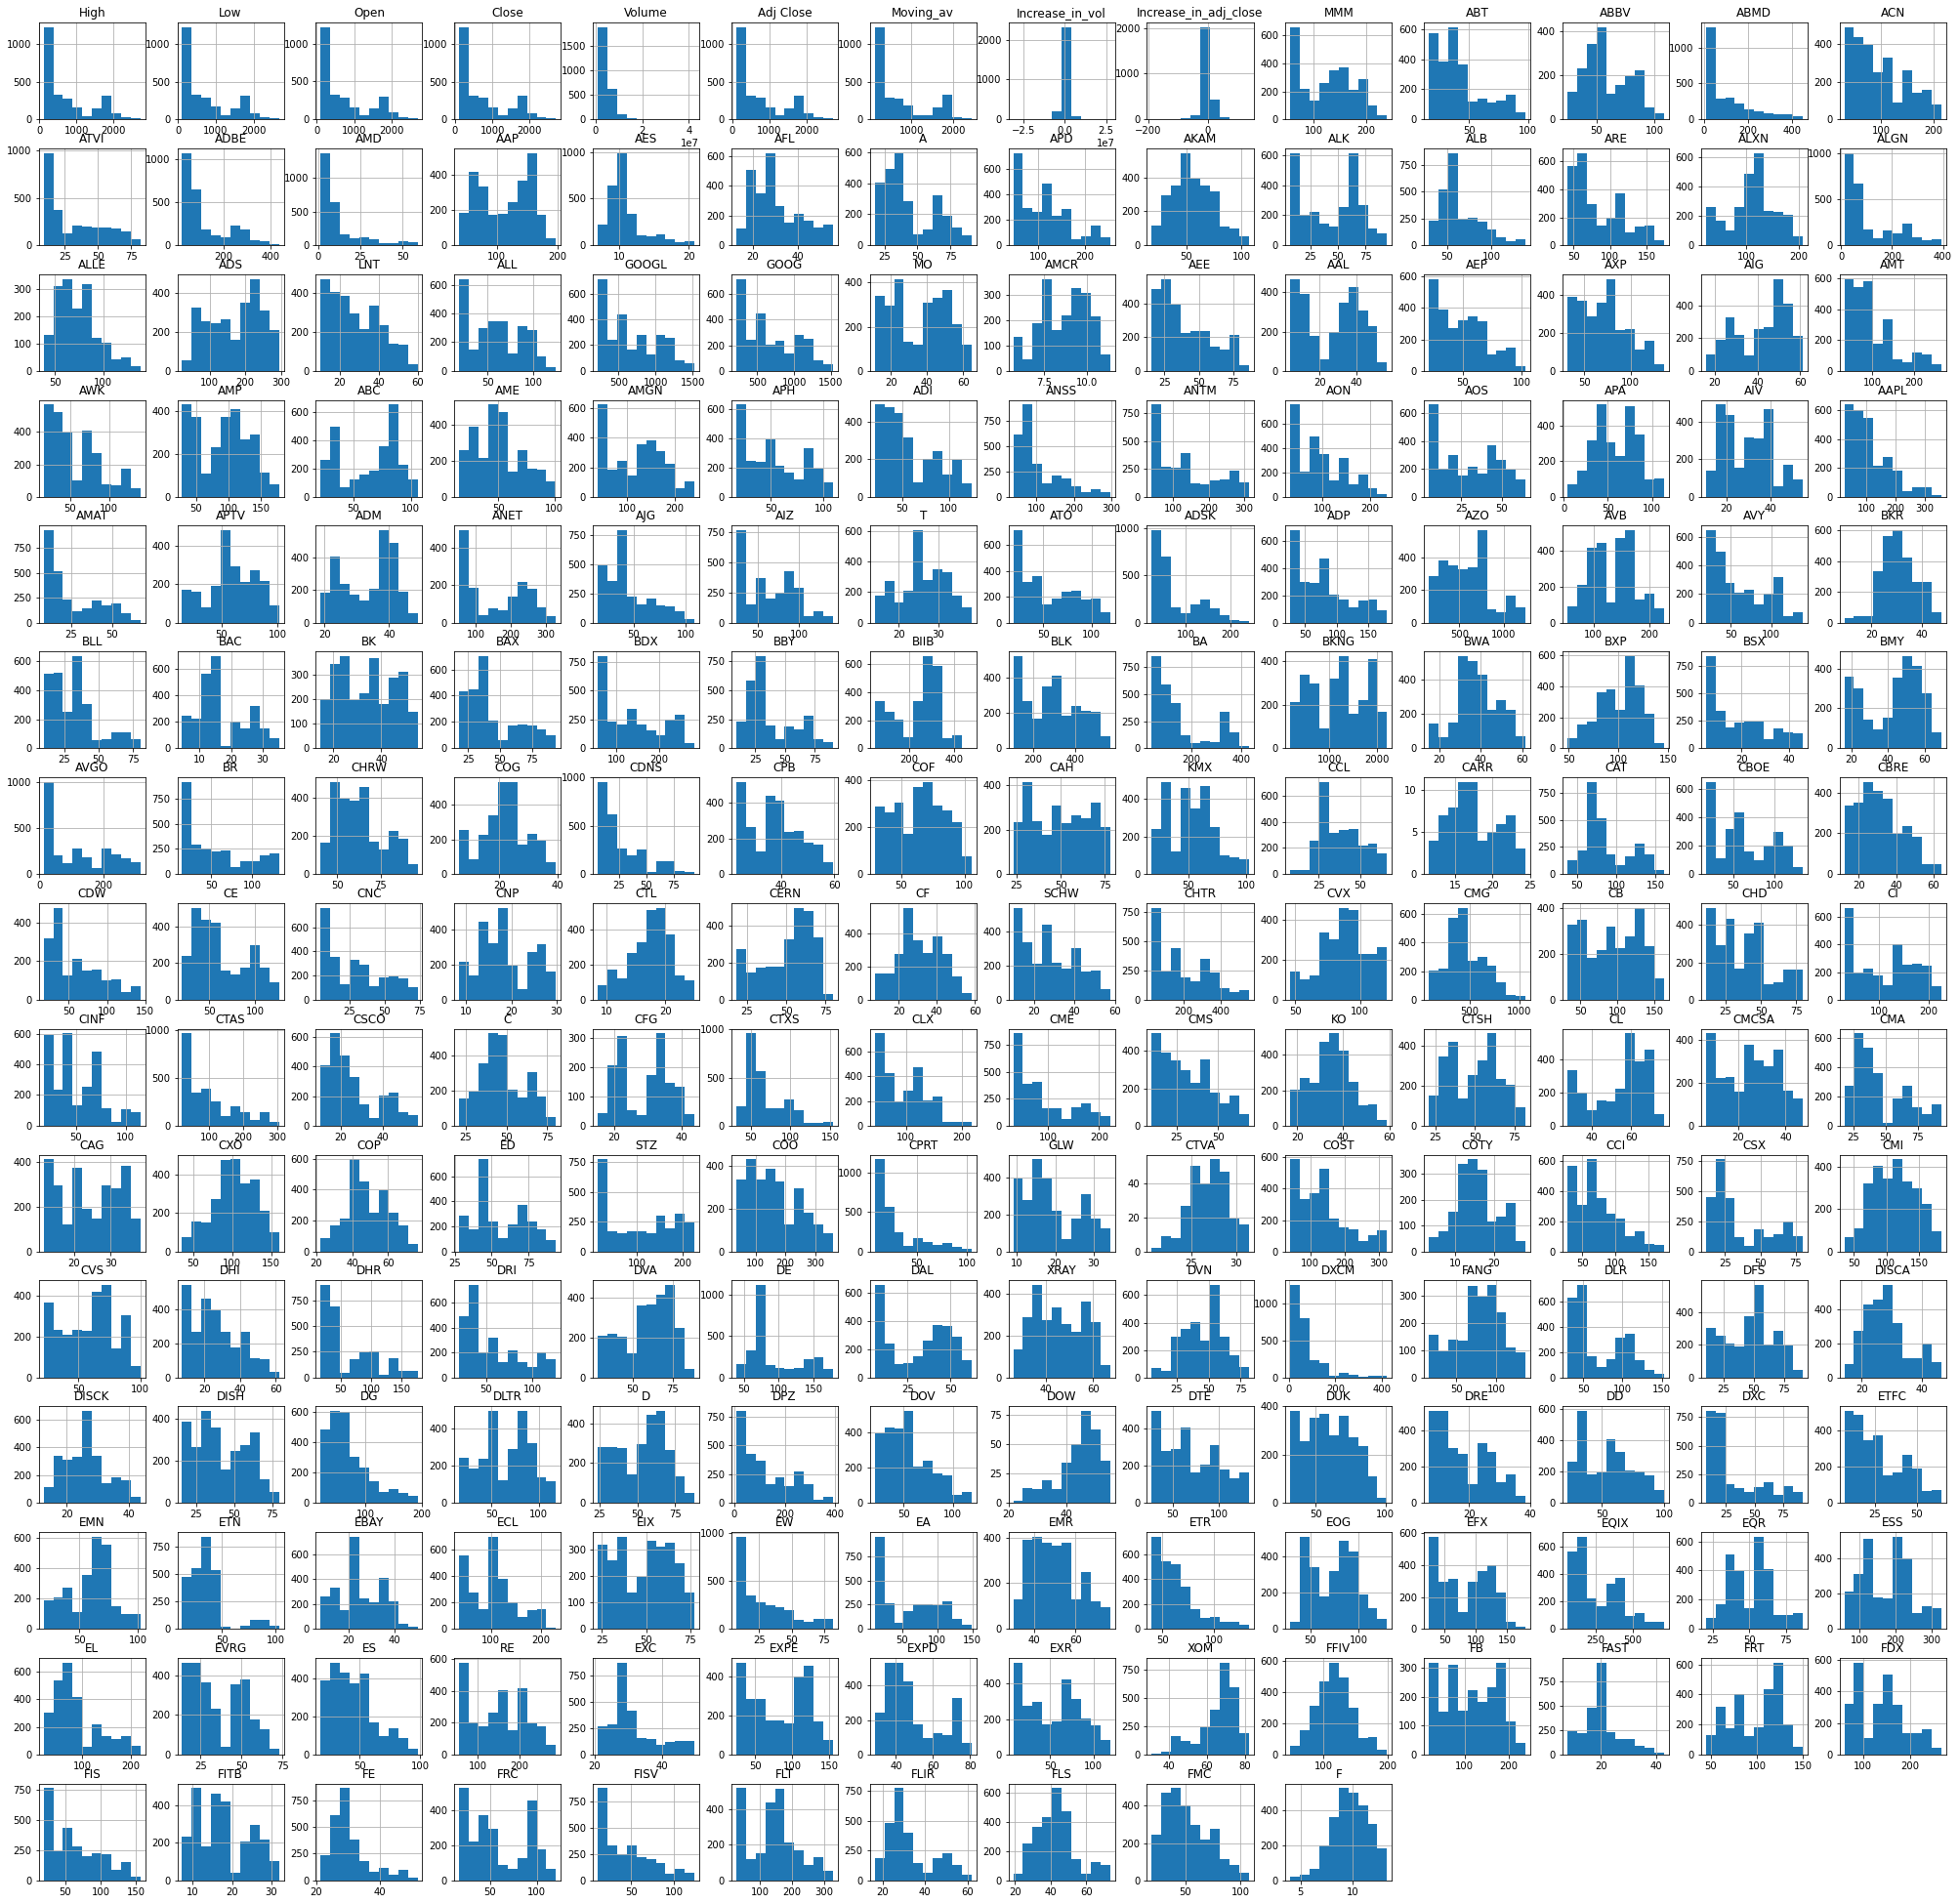

In [27]:
df3.hist(figsize = (35,35))
plt.show()

In [28]:
df3.fillna(0, inplace=True)

In [29]:
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

In [30]:
col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [31]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)

In [32]:
y_df_mod.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [33]:
Drop_cols=col_y

In [34]:
Drop_cols=Drop_cols.tolist()

In [35]:
Drop_cols.append('Date')


In [36]:
Drop_cols

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Date']

In [37]:
X_df=df3.drop(Drop_cols,axis=1)

In [38]:
X_df.columns

Index(['Moving_av', 'Increase_in_vol', 'Increase_in_adj_close', 'MMM', 'ABT',
       'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE',
       ...
       'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F'],
      dtype='object', length=200)

In [39]:
X=X_df.values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_df_mod, test_size=0.3)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 200, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [42]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)

C:\Users\prith\AppData\Local\Temp/ipykernel_2968/387401828.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)


In [43]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=regressor.fit(X_train,y_train,callbacks=[callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 50,916
Trainable params: 50,916
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
116/116 [==============================

116/116 [==============================] - 0s 2ms/step - loss: 57.8553 - accuracy: 0.7550 - mean_absolute_error: 57.8553
Epoch 54/2000
116/116 [==============================] - 0s 2ms/step - loss: 61.0787 - accuracy: 0.6732 - mean_absolute_error: 61.0787
Epoch 55/2000
116/116 [==============================] - 0s 1ms/step - loss: 61.6341 - accuracy: 0.7220 - mean_absolute_error: 61.6341
Epoch 56/2000
116/116 [==============================] - 0s 1ms/step - loss: 72.9333 - accuracy: 0.5848 - mean_absolute_error: 72.9333
Epoch 57/2000
116/116 [==============================] - 0s 1ms/step - loss: 55.5171 - accuracy: 0.6715 - mean_absolute_error: 55.5171
Epoch 58/2000
116/116 [==============================] - 0s 1ms/step - loss: 63.2387 - accuracy: 0.6992 - mean_absolute_error: 63.2387
Epoch 59/2000
116/116 [==============================] - 0s 2ms/step - loss: 57.6683 - accuracy: 0.5550 - mean_absolute_error: 57.6683
Epoch 60/2000
116/116 [==============================] - 0s 1ms/step 

116/116 [==============================] - 0s 2ms/step - loss: 42.6243 - accuracy: 0.8835 - mean_absolute_error: 42.6243
Epoch 114/2000
116/116 [==============================] - 0s 1ms/step - loss: 45.6961 - accuracy: 0.8401 - mean_absolute_error: 45.6961
Epoch 115/2000
116/116 [==============================] - 0s 1ms/step - loss: 54.1377 - accuracy: 0.7485 - mean_absolute_error: 54.1377
Epoch 116/2000
116/116 [==============================] - 0s 1ms/step - loss: 47.9595 - accuracy: 0.7079 - mean_absolute_error: 47.9595
Epoch 117/2000
116/116 [==============================] - 0s 1ms/step - loss: 52.2275 - accuracy: 0.8775 - mean_absolute_error: 52.2275
Epoch 118/2000
116/116 [==============================] - 0s 2ms/step - loss: 55.0571 - accuracy: 0.7512 - mean_absolute_error: 55.0571
Epoch 119/2000
116/116 [==============================] - 0s 1ms/step - loss: 52.9625 - accuracy: 0.8558 - mean_absolute_error: 52.9625
Epoch 120/2000
116/116 [==============================] - 0s 1m

116/116 [==============================] - 0s 1ms/step - loss: 40.9661 - accuracy: 0.8385 - mean_absolute_error: 40.9661
Epoch 174/2000
116/116 [==============================] - 0s 2ms/step - loss: 39.8090 - accuracy: 0.9144 - mean_absolute_error: 39.8090
Epoch 175/2000
116/116 [==============================] - 0s 1ms/step - loss: 44.1826 - accuracy: 0.9431 - mean_absolute_error: 44.1826
Epoch 176/2000
116/116 [==============================] - 0s 2ms/step - loss: 44.9271 - accuracy: 0.8791 - mean_absolute_error: 44.9271
Epoch 177/2000
116/116 [==============================] - 0s 2ms/step - loss: 40.4477 - accuracy: 0.9041 - mean_absolute_error: 40.4477
Epoch 178/2000
116/116 [==============================] - 0s 2ms/step - loss: 37.9231 - accuracy: 0.9593 - mean_absolute_error: 37.9231
Epoch 179/2000
116/116 [==============================] - 0s 2ms/step - loss: 47.4012 - accuracy: 0.8824 - mean_absolute_error: 47.4012
Epoch 180/2000
116/116 [==============================] - 0s 1m

116/116 [==============================] - 0s 1ms/step - loss: 39.1921 - accuracy: 0.9756 - mean_absolute_error: 39.1921
Epoch 234/2000
116/116 [==============================] - 0s 1ms/step - loss: 36.9427 - accuracy: 0.8244 - mean_absolute_error: 36.9427
Epoch 235/2000
116/116 [==============================] - 0s 2ms/step - loss: 40.1714 - accuracy: 0.9496 - mean_absolute_error: 40.1714
Epoch 236/2000
116/116 [==============================] - 0s 2ms/step - loss: 37.1191 - accuracy: 0.8450 - mean_absolute_error: 37.1191
Epoch 237/2000
116/116 [==============================] - 0s 2ms/step - loss: 34.7231 - accuracy: 0.9306 - mean_absolute_error: 34.7231
Epoch 238/2000
116/116 [==============================] - 0s 2ms/step - loss: 37.2326 - accuracy: 0.9285 - mean_absolute_error: 37.2326
Epoch 239/2000
116/116 [==============================] - 0s 2ms/step - loss: 48.8105 - accuracy: 0.9203 - mean_absolute_error: 48.8105
Epoch 240/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 1ms/step - loss: 35.1932 - accuracy: 0.9908 - mean_absolute_error: 35.1932
Epoch 294/2000
116/116 [==============================] - 0s 2ms/step - loss: 35.6251 - accuracy: 0.9935 - mean_absolute_error: 35.6251
Epoch 295/2000
116/116 [==============================] - 0s 2ms/step - loss: 36.2074 - accuracy: 0.9951 - mean_absolute_error: 36.2074
Epoch 296/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.4890 - accuracy: 0.9984 - mean_absolute_error: 31.4890
Epoch 297/2000
116/116 [==============================] - 0s 2ms/step - loss: 43.6276 - accuracy: 0.9989 - mean_absolute_error: 43.6276
Epoch 298/2000
116/116 [==============================] - 0s 2ms/step - loss: 37.3485 - accuracy: 0.9946 - mean_absolute_error: 37.3485
Epoch 299/2000
116/116 [==============================] - 0s 2ms/step - loss: 45.9085 - accuracy: 0.9767 - mean_absolute_error: 45.9085
Epoch 300/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 38.3245 - accuracy: 0.9946 - mean_absolute_error: 38.3245
Epoch 354/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.6025 - accuracy: 1.0000 - mean_absolute_error: 33.6025
Epoch 355/2000
116/116 [==============================] - 0s 2ms/step - loss: 39.2839 - accuracy: 0.9843 - mean_absolute_error: 39.2839
Epoch 356/2000
116/116 [==============================] - 0s 2ms/step - loss: 37.3194 - accuracy: 1.0000 - mean_absolute_error: 37.3194
Epoch 357/2000
116/116 [==============================] - 0s 2ms/step - loss: 36.6253 - accuracy: 0.9951 - mean_absolute_error: 36.6253
Epoch 358/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.8502 - accuracy: 1.0000 - mean_absolute_error: 30.8502
Epoch 359/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.5670 - accuracy: 1.0000 - mean_absolute_error: 33.5670
Epoch 360/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 34.9212 - accuracy: 0.9534 - mean_absolute_error: 34.9212
Epoch 414/2000
116/116 [==============================] - 0s 2ms/step - loss: 38.3823 - accuracy: 0.9978 - mean_absolute_error: 38.3823
Epoch 415/2000
116/116 [==============================] - 0s 2ms/step - loss: 34.9261 - accuracy: 0.9989 - mean_absolute_error: 34.9261
Epoch 416/2000
116/116 [==============================] - 0s 2ms/step - loss: 34.7092 - accuracy: 0.9859 - mean_absolute_error: 34.7092
Epoch 417/2000
116/116 [==============================] - 0s 2ms/step - loss: 34.9887 - accuracy: 1.0000 - mean_absolute_error: 34.9887
Epoch 418/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.3954 - accuracy: 0.9442 - mean_absolute_error: 33.3954
Epoch 419/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.8418 - accuracy: 0.9978 - mean_absolute_error: 30.8418
Epoch 420/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 35.1009 - accuracy: 0.9995 - mean_absolute_error: 35.1009
Epoch 474/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.1942 - accuracy: 0.9848 - mean_absolute_error: 32.1942
Epoch 475/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.7403 - accuracy: 0.9545 - mean_absolute_error: 32.7403
Epoch 476/2000
116/116 [==============================] - 0s 1ms/step - loss: 40.5452 - accuracy: 0.9940 - mean_absolute_error: 40.5452
Epoch 477/2000
116/116 [==============================] - 0s 2ms/step - loss: 37.5503 - accuracy: 0.9615 - mean_absolute_error: 37.5503
Epoch 478/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.5306 - accuracy: 0.9967 - mean_absolute_error: 33.5306
Epoch 479/2000
116/116 [==============================] - 0s 3ms/step - loss: 30.0690 - accuracy: 0.9930 - mean_absolute_error: 30.0690
Epoch 480/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 37.2418 - accuracy: 0.9962 - mean_absolute_error: 37.2418
Epoch 534/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.4651 - accuracy: 0.9957 - mean_absolute_error: 31.4651
Epoch 535/2000
116/116 [==============================] - 0s 2ms/step - loss: 34.4780 - accuracy: 0.9702 - mean_absolute_error: 34.4780
Epoch 536/2000
116/116 [==============================] - 0s 2ms/step - loss: 35.7813 - accuracy: 0.9745 - mean_absolute_error: 35.7813
Epoch 537/2000
116/116 [==============================] - 0s 2ms/step - loss: 39.6830 - accuracy: 0.9973 - mean_absolute_error: 39.6830
Epoch 538/2000
116/116 [==============================] - 0s 2ms/step - loss: 39.2915 - accuracy: 0.9740 - mean_absolute_error: 39.2915
Epoch 539/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.9342 - accuracy: 0.9843 - mean_absolute_error: 30.9342
Epoch 540/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 31.6010 - accuracy: 0.9913 - mean_absolute_error: 31.6010
Epoch 594/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.1936 - accuracy: 0.9897 - mean_absolute_error: 32.1936
Epoch 595/2000
116/116 [==============================] - 0s 2ms/step - loss: 39.4330 - accuracy: 0.9951 - mean_absolute_error: 39.4330
Epoch 596/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.5112 - accuracy: 0.9821 - mean_absolute_error: 33.5112
Epoch 597/2000
116/116 [==============================] - 0s 2ms/step - loss: 35.1633 - accuracy: 0.9957 - mean_absolute_error: 35.1633
Epoch 598/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.6519 - accuracy: 0.9962 - mean_absolute_error: 32.6519
Epoch 599/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.7565 - accuracy: 1.0000 - mean_absolute_error: 31.7565
Epoch 600/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 32.1833 - accuracy: 1.0000 - mean_absolute_error: 32.1833
Epoch 654/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.2707 - accuracy: 0.9328 - mean_absolute_error: 31.2707
Epoch 655/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.1400 - accuracy: 0.9962 - mean_absolute_error: 32.1400
Epoch 656/2000
116/116 [==============================] - 0s 2ms/step - loss: 38.7137 - accuracy: 1.0000 - mean_absolute_error: 38.7137
Epoch 657/2000
116/116 [==============================] - 0s 1ms/step - loss: 30.9536 - accuracy: 1.0000 - mean_absolute_error: 30.9536
Epoch 658/2000
116/116 [==============================] - 0s 1ms/step - loss: 32.2454 - accuracy: 0.9810 - mean_absolute_error: 32.2454
Epoch 659/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.2232 - accuracy: 1.0000 - mean_absolute_error: 30.2232
Epoch 660/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 32.2844 - accuracy: 0.9713 - mean_absolute_error: 32.2844
Epoch 714/2000
116/116 [==============================] - 0s 2ms/step - loss: 36.7361 - accuracy: 0.9566 - mean_absolute_error: 36.7361
Epoch 715/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.2169 - accuracy: 1.0000 - mean_absolute_error: 30.2169
Epoch 716/2000
116/116 [==============================] - 0s 2ms/step - loss: 35.1177 - accuracy: 0.9924 - mean_absolute_error: 35.1177
Epoch 717/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.9374 - accuracy: 0.9003 - mean_absolute_error: 29.9374
Epoch 718/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.6993 - accuracy: 0.9214 - mean_absolute_error: 32.6993
Epoch 719/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.7190 - accuracy: 0.9837 - mean_absolute_error: 31.7190
Epoch 720/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 29.2337 - accuracy: 0.9973 - mean_absolute_error: 29.2337
Epoch 774/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.1005 - accuracy: 0.9528 - mean_absolute_error: 33.1005
Epoch 775/2000
116/116 [==============================] - 0s 1ms/step - loss: 33.5616 - accuracy: 0.9984 - mean_absolute_error: 33.5616
Epoch 776/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.9179 - accuracy: 0.9984 - mean_absolute_error: 32.9179
Epoch 777/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.4511 - accuracy: 1.0000 - mean_absolute_error: 31.4511
Epoch 778/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.5258 - accuracy: 0.9886 - mean_absolute_error: 31.5258
Epoch 779/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.0421 - accuracy: 0.9995 - mean_absolute_error: 31.0421
Epoch 780/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 29.8440 - accuracy: 1.0000 - mean_absolute_error: 29.8440
Epoch 834/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.3408 - accuracy: 0.9886 - mean_absolute_error: 31.3408
Epoch 835/2000
116/116 [==============================] - 0s 2ms/step - loss: 34.2616 - accuracy: 0.9491 - mean_absolute_error: 34.2616
Epoch 836/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.8636 - accuracy: 0.9908 - mean_absolute_error: 29.8636
Epoch 837/2000
116/116 [==============================] - 0s 2ms/step - loss: 35.2556 - accuracy: 0.9550 - mean_absolute_error: 35.2556
Epoch 838/2000
116/116 [==============================] - 0s 1ms/step - loss: 31.9049 - accuracy: 1.0000 - mean_absolute_error: 31.9049
Epoch 839/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.1475 - accuracy: 0.9935 - mean_absolute_error: 28.1475
Epoch 840/2000
116/116 [==============================] - 0s 2m

116/116 [==============================] - 0s 2ms/step - loss: 28.7365 - accuracy: 0.9854 - mean_absolute_error: 28.7365
Epoch 894/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.5842 - accuracy: 0.9924 - mean_absolute_error: 28.5842
Epoch 895/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.2251 - accuracy: 0.9160 - mean_absolute_error: 30.2251
Epoch 896/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.6970 - accuracy: 1.0000 - mean_absolute_error: 27.6970
Epoch 897/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.1314 - accuracy: 0.9832 - mean_absolute_error: 31.1314
Epoch 898/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.2481 - accuracy: 0.9967 - mean_absolute_error: 32.2481
Epoch 899/2000
116/116 [==============================] - 0s 1ms/step - loss: 33.5772 - accuracy: 0.9967 - mean_absolute_error: 33.5772
Epoch 900/2000
116/116 [==============================] - 0s 1m

116/116 [==============================] - 0s 2ms/step - loss: 31.5105 - accuracy: 0.9637 - mean_absolute_error: 31.5105
Epoch 954/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.5667 - accuracy: 0.9810 - mean_absolute_error: 33.5667
Epoch 955/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.5754 - accuracy: 0.9978 - mean_absolute_error: 26.5754
Epoch 956/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.5281 - accuracy: 1.0000 - mean_absolute_error: 30.5281
Epoch 957/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.9793 - accuracy: 0.9908 - mean_absolute_error: 28.9793
Epoch 958/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.3856 - accuracy: 0.9957 - mean_absolute_error: 29.3856
Epoch 959/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.8844 - accuracy: 0.9946 - mean_absolute_error: 30.8844
Epoch 960/2000
116/116 [==============================] - 0s 1m

116/116 [==============================] - 0s 1ms/step - loss: 28.0043 - accuracy: 0.9556 - mean_absolute_error: 28.0043
Epoch 1014/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.7582 - accuracy: 1.0000 - mean_absolute_error: 27.7582
Epoch 1015/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.2809 - accuracy: 1.0000 - mean_absolute_error: 28.2809
Epoch 1016/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.6230 - accuracy: 1.0000 - mean_absolute_error: 31.6230
Epoch 1017/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.0601 - accuracy: 0.9854 - mean_absolute_error: 33.0601
Epoch 1018/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.0231 - accuracy: 1.0000 - mean_absolute_error: 32.0231
Epoch 1019/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.1617 - accuracy: 0.9556 - mean_absolute_error: 28.1617
Epoch 1020/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 29.5067 - accuracy: 0.9978 - mean_absolute_error: 29.5067
Epoch 1073/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.5309 - accuracy: 0.9491 - mean_absolute_error: 33.5309
Epoch 1074/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.1413 - accuracy: 1.0000 - mean_absolute_error: 32.1413
Epoch 1075/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.3904 - accuracy: 1.0000 - mean_absolute_error: 28.3904
Epoch 1076/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.1542 - accuracy: 1.0000 - mean_absolute_error: 30.1542
Epoch 1077/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.0608 - accuracy: 1.0000 - mean_absolute_error: 31.0608
Epoch 1078/2000
116/116 [==============================] - 0s 4ms/step - loss: 30.9616 - accuracy: 0.9122 - mean_absolute_error: 30.9616
Epoch 1079/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 33.9774 - accuracy: 0.8401 - mean_absolute_error: 33.9774
Epoch 1132/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.6552 - accuracy: 0.9772 - mean_absolute_error: 30.6552
Epoch 1133/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.4136 - accuracy: 0.9832 - mean_absolute_error: 27.4136
Epoch 1134/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.5602 - accuracy: 0.9951 - mean_absolute_error: 28.5602
Epoch 1135/2000
116/116 [==============================] - 0s 2ms/step - loss: 34.0241 - accuracy: 0.9740 - mean_absolute_error: 34.0241
Epoch 1136/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.4215 - accuracy: 0.9729 - mean_absolute_error: 31.4215
Epoch 1137/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.7225 - accuracy: 0.9279 - mean_absolute_error: 29.7225
Epoch 1138/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 26.7326 - accuracy: 0.9995 - mean_absolute_error: 26.7326
Epoch 1191/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.7423 - accuracy: 0.9962 - mean_absolute_error: 33.7423
Epoch 1192/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.8333 - accuracy: 1.0000 - mean_absolute_error: 29.8333
Epoch 1193/2000
116/116 [==============================] - 0s 2ms/step - loss: 32.8898 - accuracy: 0.9919 - mean_absolute_error: 32.8898
Epoch 1194/2000
116/116 [==============================] - 0s 1ms/step - loss: 31.3099 - accuracy: 0.9957 - mean_absolute_error: 31.3099
Epoch 1195/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.5398 - accuracy: 0.9864 - mean_absolute_error: 31.5398
Epoch 1196/2000
116/116 [==============================] - 0s 2ms/step - loss: 33.0448 - accuracy: 0.9301 - mean_absolute_error: 33.0448
Epoch 1197/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 29.3087 - accuracy: 1.0000 - mean_absolute_error: 29.3087
Epoch 1250/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.9555 - accuracy: 0.9989 - mean_absolute_error: 27.9555
Epoch 1251/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.3497 - accuracy: 0.9653 - mean_absolute_error: 28.3497
Epoch 1252/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.1848 - accuracy: 0.9507 - mean_absolute_error: 29.1848
Epoch 1253/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.2591 - accuracy: 0.9854 - mean_absolute_error: 28.2591
Epoch 1254/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.1586 - accuracy: 0.9534 - mean_absolute_error: 28.1586
Epoch 1255/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.7063 - accuracy: 1.0000 - mean_absolute_error: 27.7063
Epoch 1256/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 28.3059 - accuracy: 0.8710 - mean_absolute_error: 28.3059
Epoch 1309/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.5838 - accuracy: 1.0000 - mean_absolute_error: 28.5838
Epoch 1310/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.6920 - accuracy: 0.9848 - mean_absolute_error: 27.6920
Epoch 1311/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.1806 - accuracy: 0.9967 - mean_absolute_error: 31.1806
Epoch 1312/2000
116/116 [==============================] - 0s 2ms/step - loss: 25.9759 - accuracy: 1.0000 - mean_absolute_error: 25.9759
Epoch 1313/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.1583 - accuracy: 0.9696 - mean_absolute_error: 30.1583
Epoch 1314/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.6497 - accuracy: 0.9301 - mean_absolute_error: 27.6497
Epoch 1315/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 30.7773 - accuracy: 0.9973 - mean_absolute_error: 30.7773
Epoch 1368/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.9126 - accuracy: 0.9978 - mean_absolute_error: 30.9126
Epoch 1369/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.7943 - accuracy: 0.9973 - mean_absolute_error: 28.7943
Epoch 1370/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.2794 - accuracy: 0.9995 - mean_absolute_error: 29.2794
Epoch 1371/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.0233 - accuracy: 0.9843 - mean_absolute_error: 29.0233
Epoch 1372/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.9840 - accuracy: 0.9973 - mean_absolute_error: 27.9840
Epoch 1373/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.5971 - accuracy: 0.9962 - mean_absolute_error: 29.5971
Epoch 1374/2000
116/116 [==============================] 

116/116 [==============================] - 0s 1ms/step - loss: 29.3808 - accuracy: 0.9995 - mean_absolute_error: 29.3808
Epoch 1427/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.4656 - accuracy: 1.0000 - mean_absolute_error: 29.4656
Epoch 1428/2000
116/116 [==============================] - 0s 1ms/step - loss: 29.7808 - accuracy: 0.9740 - mean_absolute_error: 29.7808
Epoch 1429/2000
116/116 [==============================] - 0s 1ms/step - loss: 32.9222 - accuracy: 0.9989 - mean_absolute_error: 32.9222
Epoch 1430/2000
116/116 [==============================] - 0s 1ms/step - loss: 29.7848 - accuracy: 0.9740 - mean_absolute_error: 29.7848
Epoch 1431/2000
116/116 [==============================] - 0s 1ms/step - loss: 26.6298 - accuracy: 0.9491 - mean_absolute_error: 26.6298
Epoch 1432/2000
116/116 [==============================] - 0s 1ms/step - loss: 29.1345 - accuracy: 0.9382 - mean_absolute_error: 29.1345
Epoch 1433/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 29.9562 - accuracy: 1.0000 - mean_absolute_error: 29.9562
Epoch 1486/2000
116/116 [==============================] - 0s 1ms/step - loss: 33.5697 - accuracy: 0.9995 - mean_absolute_error: 33.5697
Epoch 1487/2000
116/116 [==============================] - 0s 2ms/step - loss: 24.1761 - accuracy: 0.9864 - mean_absolute_error: 24.1761
Epoch 1488/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.6107 - accuracy: 1.0000 - mean_absolute_error: 27.6107
Epoch 1489/2000
116/116 [==============================] - 0s 1ms/step - loss: 26.8558 - accuracy: 0.9377 - mean_absolute_error: 26.8558
Epoch 1490/2000
116/116 [==============================] - 0s 1ms/step - loss: 24.8987 - accuracy: 0.9789 - mean_absolute_error: 24.8987
Epoch 1491/2000
116/116 [==============================] - 0s 1ms/step - loss: 29.7077 - accuracy: 1.0000 - mean_absolute_error: 29.7077
Epoch 1492/2000
116/116 [==============================] 

116/116 [==============================] - 0s 1ms/step - loss: 26.7477 - accuracy: 1.0000 - mean_absolute_error: 26.7477
Epoch 1545/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.9200 - accuracy: 1.0000 - mean_absolute_error: 27.9200
Epoch 1546/2000
116/116 [==============================] - 0s 1ms/step - loss: 28.8869 - accuracy: 0.9388 - mean_absolute_error: 28.8869
Epoch 1547/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.0841 - accuracy: 0.9789 - mean_absolute_error: 27.0841
Epoch 1548/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.6218 - accuracy: 0.9984 - mean_absolute_error: 29.6218
Epoch 1549/2000
116/116 [==============================] - 0s 1ms/step - loss: 28.6456 - accuracy: 1.0000 - mean_absolute_error: 28.6456
Epoch 1550/2000
116/116 [==============================] - 0s 1ms/step - loss: 25.9396 - accuracy: 0.9198 - mean_absolute_error: 25.9396
Epoch 1551/2000
116/116 [==============================] 

116/116 [==============================] - 0s 1ms/step - loss: 30.1942 - accuracy: 1.0000 - mean_absolute_error: 30.1942
Epoch 1604/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.6521 - accuracy: 0.9810 - mean_absolute_error: 27.6521
Epoch 1605/2000
116/116 [==============================] - 0s 1ms/step - loss: 28.9600 - accuracy: 1.0000 - mean_absolute_error: 28.9600
Epoch 1606/2000
116/116 [==============================] - 0s 1ms/step - loss: 28.0916 - accuracy: 1.0000 - mean_absolute_error: 28.0916
Epoch 1607/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.7634 - accuracy: 1.0000 - mean_absolute_error: 28.7634
Epoch 1608/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.8067 - accuracy: 1.0000 - mean_absolute_error: 26.8067
Epoch 1609/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.0784 - accuracy: 1.0000 - mean_absolute_error: 26.0784
Epoch 1610/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 27.7892 - accuracy: 1.0000 - mean_absolute_error: 27.7892
Epoch 1663/2000
116/116 [==============================] - 0s 1ms/step - loss: 26.8236 - accuracy: 0.9501 - mean_absolute_error: 26.8236
Epoch 1664/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.8830 - accuracy: 1.0000 - mean_absolute_error: 27.8830
Epoch 1665/2000
116/116 [==============================] - 0s 2ms/step - loss: 25.5347 - accuracy: 1.0000 - mean_absolute_error: 25.5347
Epoch 1666/2000
116/116 [==============================] - 0s 2ms/step - loss: 29.0723 - accuracy: 0.9859 - mean_absolute_error: 29.0723
Epoch 1667/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.4315 - accuracy: 0.9935 - mean_absolute_error: 27.4315
Epoch 1668/2000
116/116 [==============================] - 0s 1ms/step - loss: 26.3381 - accuracy: 0.9165 - mean_absolute_error: 26.3381
Epoch 1669/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 29.8743 - accuracy: 1.0000 - mean_absolute_error: 29.8743
Epoch 1722/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.1434 - accuracy: 1.0000 - mean_absolute_error: 30.1434
Epoch 1723/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.5324 - accuracy: 1.0000 - mean_absolute_error: 27.5324
Epoch 1724/2000
116/116 [==============================] - 0s 1ms/step - loss: 29.7557 - accuracy: 0.9995 - mean_absolute_error: 29.7557
Epoch 1725/2000
116/116 [==============================] - 0s 1ms/step - loss: 24.9228 - accuracy: 1.0000 - mean_absolute_error: 24.9228
Epoch 1726/2000
116/116 [==============================] - 0s 1ms/step - loss: 28.6557 - accuracy: 1.0000 - mean_absolute_error: 28.6557
Epoch 1727/2000
116/116 [==============================] - 0s 1ms/step - loss: 32.6884 - accuracy: 1.0000 - mean_absolute_error: 32.6884
Epoch 1728/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 25.5176 - accuracy: 0.9864 - mean_absolute_error: 25.5176
Epoch 1781/2000
116/116 [==============================] - 0s 1ms/step - loss: 26.9436 - accuracy: 0.9897 - mean_absolute_error: 26.9436
Epoch 1782/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.1786 - accuracy: 1.0000 - mean_absolute_error: 27.1786
Epoch 1783/2000
116/116 [==============================] - 0s 1ms/step - loss: 27.3502 - accuracy: 0.9864 - mean_absolute_error: 27.3502
Epoch 1784/2000
116/116 [==============================] - 0s 1ms/step - loss: 26.7317 - accuracy: 0.9967 - mean_absolute_error: 26.7317
Epoch 1785/2000
116/116 [==============================] - 0s 1ms/step - loss: 28.0564 - accuracy: 1.0000 - mean_absolute_error: 28.0564
Epoch 1786/2000
116/116 [==============================] - 0s 1ms/step - loss: 26.6906 - accuracy: 0.9973 - mean_absolute_error: 26.6906
Epoch 1787/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 27.7967 - accuracy: 1.0000 - mean_absolute_error: 27.7967
Epoch 1840/2000
116/116 [==============================] - 0s 2ms/step - loss: 27.7693 - accuracy: 1.0000 - mean_absolute_error: 27.7693
Epoch 1841/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.1784 - accuracy: 0.9794 - mean_absolute_error: 26.1784
Epoch 1842/2000
116/116 [==============================] - 0s 2ms/step - loss: 25.4765 - accuracy: 1.0000 - mean_absolute_error: 25.4765
Epoch 1843/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.0406 - accuracy: 1.0000 - mean_absolute_error: 28.0406
Epoch 1844/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.7112 - accuracy: 1.0000 - mean_absolute_error: 26.7112
Epoch 1845/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.6242 - accuracy: 1.0000 - mean_absolute_error: 28.6242
Epoch 1846/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 33.3922 - accuracy: 0.9680 - mean_absolute_error: 33.3922
Epoch 1899/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.0355 - accuracy: 0.9669 - mean_absolute_error: 26.0355
Epoch 1900/2000
116/116 [==============================] - 0s 2ms/step - loss: 25.4545 - accuracy: 1.0000 - mean_absolute_error: 25.4545
Epoch 1901/2000
116/116 [==============================] - 0s 2ms/step - loss: 24.7833 - accuracy: 0.9550 - mean_absolute_error: 24.7833
Epoch 1902/2000
116/116 [==============================] - 0s 2ms/step - loss: 31.0220 - accuracy: 1.0000 - mean_absolute_error: 31.0220
Epoch 1903/2000
116/116 [==============================] - 0s 2ms/step - loss: 25.0983 - accuracy: 0.9946 - mean_absolute_error: 25.0983
Epoch 1904/2000
116/116 [==============================] - 0s 2ms/step - loss: 39.6021 - accuracy: 0.9843 - mean_absolute_error: 39.6021
Epoch 1905/2000
116/116 [==============================] 

116/116 [==============================] - 0s 2ms/step - loss: 26.9999 - accuracy: 0.9767 - mean_absolute_error: 26.9999
Epoch 1958/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.4174 - accuracy: 1.0000 - mean_absolute_error: 28.4174
Epoch 1959/2000
116/116 [==============================] - 0s 2ms/step - loss: 28.1888 - accuracy: 1.0000 - mean_absolute_error: 28.1888
Epoch 1960/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.8031 - accuracy: 0.9371 - mean_absolute_error: 26.8031
Epoch 1961/2000
116/116 [==============================] - 0s 2ms/step - loss: 30.1933 - accuracy: 0.9924 - mean_absolute_error: 30.1933
Epoch 1962/2000
116/116 [==============================] - 0s 2ms/step - loss: 26.4668 - accuracy: 0.9138 - mean_absolute_error: 26.4668
Epoch 1963/2000
116/116 [==============================] - 0s 2ms/step - loss: 25.6226 - accuracy: 1.0000 - mean_absolute_error: 25.6226
Epoch 1964/2000
116/116 [==============================] 

In [44]:
y_pred= regressor.predict(X_test)

50/50 [==============================] - 0s 936us/step


In [45]:
print(y_pred)
print(y_pred.shape)

[[1364.339   1341.4227  1351.2731  1357.8888 ]
 [ 241.63702  236.6426   238.82481  240.1369 ]
 [ 791.2458   777.4779   783.414    787.3224 ]
 ...
 [ 316.88956  310.69385  313.39005  315.05762]
 [1620.044   1593.0458  1604.6427  1612.4662 ]
 [ 623.1905   612.1053   616.89355  620.00806]]
(791, 4)


In [46]:
print(y_test)

             High          Low         Open        Close
2037  1458.979980  1320.719971  1402.619995  1390.000000
710    235.940002   227.949997   235.880005   228.490005
1671   759.849976   752.099976   757.500000   759.479980
271    173.710007   166.899994   171.449997   171.139999
1516   619.849976   598.570007   612.479980   617.739990
...           ...          ...          ...          ...
2128  1720.869995  1708.520020  1714.000000  1715.969971
1268   296.000000   286.820007   294.000000   286.950012
1111   307.920013   305.070007   305.750000   307.190002
2284  1676.949951  1619.680054  1623.000000  1670.430054
1514   630.000000   605.210022   621.799988   607.940002

[791 rows x 4 columns]


In [47]:
import numpy as np
my_array = np.array(y_test)

In [49]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,4):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(my_array[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))


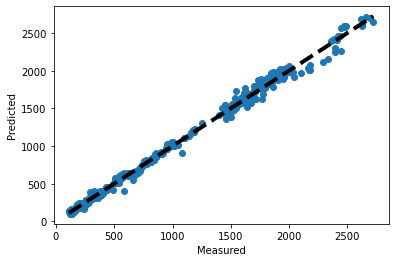

In [50]:
#high prediction
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

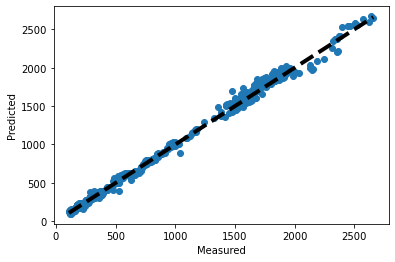

In [51]:
#low prediction
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

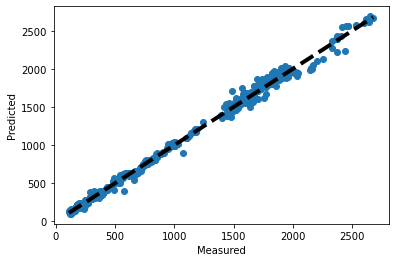

In [52]:
#open prediction
fig, ax = plt.subplots()
ax.scatter(y_test_mod[2], y_pred_mod[2])
ax.plot([y_test_mod[2].min(),y_test_mod[2].max()], [y_test_mod[2].min(), y_test_mod[2].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

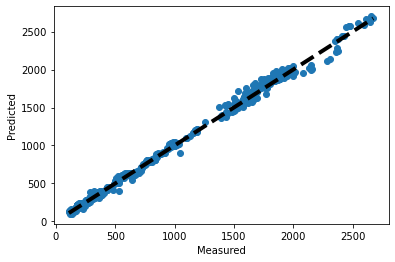

In [53]:
#close prediction
fig, ax = plt.subplots()
ax.scatter(y_test_mod[3], y_pred_mod[3])
ax.plot([y_test_mod[3].min(),y_test_mod[3].max()], [y_test_mod[3].min(), y_test_mod[3].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
#regression complete

In [54]:
#applying rnn
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [56]:
df1=pd.read_csv('dataset_target.csv')
df1.head

<bound method NDFrame.head of             Date         High          Low         Open        Close  \
0     2009-12-31   137.279999   134.520004   137.089996   134.520004   
1     2010-01-04   136.610001   133.139999   136.250000   133.899994   
2     2010-01-05   135.479996   131.809998   133.429993   134.690002   
3     2010-01-06   134.729996   131.649994   134.600006   132.250000   
4     2010-01-07   132.320007   128.800003   132.009995   130.000000   
...          ...          ...          ...          ...          ...   
2631  2020-06-16  2620.000000  2576.000000  2620.000000  2615.270020   
2632  2020-06-17  2655.000000  2631.820068  2647.500000  2640.979980   
2633  2020-06-18  2659.639893  2636.110107  2647.010010  2653.979980   
2634  2020-06-19  2697.429932  2659.000000  2678.080078  2675.010010   
2635  2020-06-22  2705.219971  2669.000000  2684.500000  2703.360107   

        Volume    Adj Close  
0      4523000   134.520004  
1      7599900   133.899994  
2      8851900 

In [57]:
df2=pd.read_csv('dataset_target_2.csv')
df2.head

<bound method NDFrame.head of              High          Low         Open        Close    Volume  \
0      137.279999   134.520004   137.089996   134.520004   4523000   
1      136.610001   133.139999   136.250000   133.899994   7599900   
2      135.479996   131.809998   133.429993   134.690002   8851900   
3      134.729996   131.649994   134.600006   132.250000   7178800   
4      132.320007   128.800003   132.009995   130.000000  11030200   
...           ...          ...          ...          ...       ...   
2631  2620.000000  2576.000000  2620.000000  2615.270020   3585600   
2632  2655.000000  2631.820068  2647.500000  2640.979980   2951100   
2633  2659.639893  2636.110107  2647.010010  2653.979980   2487800   
2634  2697.429932  2659.000000  2678.080078  2675.010010   5773300   
2635  2705.219971  2669.000000  2684.500000  2703.360107   2176461   

        Adj Close    Moving_av  Increase_in_vol  Increase_in_adj_close  \
0      134.520004   134.520004              0.0        

In [58]:
df_main=df2.drop(['Date'],axis=1)

In [59]:
print(df_main.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  137.279999  134.520004  137.089996  134.520004   4523000  134.520004   
1  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
2  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
3  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
4  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   

    Moving_av  Increase_in_vol  Increase_in_adj_close  
0  134.520004              0.0               0.000000  
1  134.209999        3076900.0              -0.620010  
2  134.370000        1252000.0               0.790009  
3  133.840000       -1673100.0              -2.440002  
4  133.072000        3851400.0              -2.250000  


In [61]:
print(len(df_main))

2636


In [62]:
df_train=df_main[:2200]

In [63]:
print(df_train.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  137.279999  134.520004  137.089996  134.520004   4523000  134.520004   
1  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
2  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
3  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
4  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   

    Moving_av  Increase_in_vol  Increase_in_adj_close  
0  134.520004              0.0               0.000000  
1  134.209999        3076900.0              -0.620010  
2  134.370000        1252000.0               0.790009  
3  133.840000       -1673100.0              -2.440002  
4  133.072000        3851400.0              -2.250000  


In [64]:
sc = MinMaxScaler(feature_range = (0, 1))

In [65]:
df_target=df_train[['High','Low','Open','Close']]

In [66]:
target_set=df_target.values

In [67]:
train_set=df_train.values

In [68]:
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [69]:
X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [70]:
print(X_train.shape)

(2150, 50, 9)


In [71]:
print(y_train.shape)

(2150, 4)


In [72]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 9)))
    mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
   
    mod.add((LSTM(units = 64)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 16, activation='tanh')))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 4, activation='tanh')))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
    mod.summary()
    
    return mod

In [73]:
RNN_model=model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            18944     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 batch_normalization (BatchN  (None, 50, 64)           256       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 50, 64)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 50, 64)           256       
 hNormalization)                                      

In [74]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='./RNN_model.h5',
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
RNN_model.fit(X_train, y_train, epochs = 2000, batch_size = 32,callbacks=[callback])

Epoch 1/2000
68/68 [==============================] - 7s 42ms/step - loss: 0.1153 - accuracy: 0.2451 - mean_squared_error: 0.1153
Epoch 2/2000
68/68 [==============================] - 3s 43ms/step - loss: 0.0148 - accuracy: 0.2600 - mean_squared_error: 0.0148
Epoch 3/2000
68/68 [==============================] - 3s 41ms/step - loss: 0.0098 - accuracy: 0.2721 - mean_squared_error: 0.0098
Epoch 4/2000
68/68 [==============================] - 3s 39ms/step - loss: 0.0105 - accuracy: 0.2586 - mean_squared_error: 0.0105
Epoch 5/2000
68/68 [==============================] - 3s 41ms/step - loss: 0.0080 - accuracy: 0.2381 - mean_squared_error: 0.0080
Epoch 6/2000
68/68 [==============================] - 3s 42ms/step - loss: 0.0082 - accuracy: 0.2405 - mean_squared_error: 0.0082
Epoch 7/2000
68/68 [==============================] - 3s 44ms/step - loss: 0.0123 - accuracy: 0.2326 - mean_squared_error: 0.0123
Epoch 8/2000
68/68 [==============================] - 3s 43ms/step - loss: 0.0084 - accura

68/68 [==============================] - 3s 48ms/step - loss: 0.0037 - accuracy: 0.2874 - mean_squared_error: 0.0037
Epoch 64/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0039 - accuracy: 0.2702 - mean_squared_error: 0.0039
Epoch 65/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0040 - accuracy: 0.2614 - mean_squared_error: 0.0040
Epoch 66/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0036 - accuracy: 0.2977 - mean_squared_error: 0.0036
Epoch 67/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0037 - accuracy: 0.2833 - mean_squared_error: 0.0037
Epoch 68/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0033 - accuracy: 0.2660 - mean_squared_error: 0.0033
Epoch 69/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0029 - accuracy: 0.2298 - mean_squared_error: 0.0029
Epoch 70/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0029 - accuracy: 0.

68/68 [==============================] - 3s 49ms/step - loss: 0.0022 - accuracy: 0.3177 - mean_squared_error: 0.0022
Epoch 126/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0023 - accuracy: 0.3330 - mean_squared_error: 0.0023
Epoch 127/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0023 - accuracy: 0.3177 - mean_squared_error: 0.0023
Epoch 128/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0024 - accuracy: 0.2884 - mean_squared_error: 0.0024
Epoch 129/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0026 - accuracy: 0.3130 - mean_squared_error: 0.0026
Epoch 130/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0025 - accuracy: 0.3367 - mean_squared_error: 0.0025
Epoch 131/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0019 - accuracy: 0.2712 - mean_squared_error: 0.0019
Epoch 132/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0034 - accur

68/68 [==============================] - 3s 50ms/step - loss: 0.0020 - accuracy: 0.3172 - mean_squared_error: 0.0020
Epoch 188/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0026 - accuracy: 0.2763 - mean_squared_error: 0.0026
Epoch 189/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0030 - accuracy: 0.3679 - mean_squared_error: 0.0030
Epoch 190/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0023 - accuracy: 0.3163 - mean_squared_error: 0.0023
Epoch 191/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0021 - accuracy: 0.3377 - mean_squared_error: 0.0021
Epoch 192/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0027 - accuracy: 0.3735 - mean_squared_error: 0.0027
Epoch 193/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0022 - accuracy: 0.3251 - mean_squared_error: 0.0022
Epoch 194/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0023 - accur

68/68 [==============================] - 3s 51ms/step - loss: 0.0031 - accuracy: 0.3140 - mean_squared_error: 0.0031
Epoch 250/2000
68/68 [==============================] - 4s 55ms/step - loss: 0.0027 - accuracy: 0.3958 - mean_squared_error: 0.0027
Epoch 251/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0024 - accuracy: 0.3860 - mean_squared_error: 0.0024
Epoch 252/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0024 - accuracy: 0.3233 - mean_squared_error: 0.0024
Epoch 253/2000
68/68 [==============================] - 4s 53ms/step - loss: 0.0031 - accuracy: 0.3577 - mean_squared_error: 0.0031
Epoch 254/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0032 - accuracy: 0.3386 - mean_squared_error: 0.0032
Epoch 255/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0030 - accuracy: 0.3191 - mean_squared_error: 0.0030
Epoch 256/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0028 - accur

68/68 [==============================] - 4s 58ms/step - loss: 0.0033 - accuracy: 0.2865 - mean_squared_error: 0.0033
Epoch 312/2000
68/68 [==============================] - 4s 57ms/step - loss: 0.0015 - accuracy: 0.2953 - mean_squared_error: 0.0015
Epoch 313/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0017 - accuracy: 0.3400 - mean_squared_error: 0.0017
Epoch 314/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0022 - accuracy: 0.3279 - mean_squared_error: 0.0022
Epoch 315/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0013 - accuracy: 0.3679 - mean_squared_error: 0.0013
Epoch 316/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0033 - accuracy: 0.3019 - mean_squared_error: 0.0033
Epoch 317/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0034 - accuracy: 0.2721 - mean_squared_error: 0.0034
Epoch 318/2000
68/68 [==============================] - 4s 57ms/step - loss: 0.0023 - accur

68/68 [==============================] - 4s 59ms/step - loss: 0.0018 - accuracy: 0.3842 - mean_squared_error: 0.0018
Epoch 374/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0021 - accuracy: 0.3865 - mean_squared_error: 0.0021
Epoch 375/2000
68/68 [==============================] - 4s 57ms/step - loss: 0.0025 - accuracy: 0.3484 - mean_squared_error: 0.0025
Epoch 376/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0030 - accuracy: 0.3219 - mean_squared_error: 0.0030
Epoch 377/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0021 - accuracy: 0.3637 - mean_squared_error: 0.0021
Epoch 378/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0027 - accuracy: 0.3688 - mean_squared_error: 0.0027
Epoch 379/2000
68/68 [==============================] - 4s 57ms/step - loss: 0.0018 - accuracy: 0.3991 - mean_squared_error: 0.0018
Epoch 380/2000
68/68 [==============================] - 4s 58ms/step - loss: 0.0023 - accur

68/68 [==============================] - 4s 53ms/step - loss: 0.0028 - accuracy: 0.3488 - mean_squared_error: 0.0028
Epoch 436/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0022 - accuracy: 0.3330 - mean_squared_error: 0.0022
Epoch 437/2000
68/68 [==============================] - 4s 53ms/step - loss: 0.0018 - accuracy: 0.3721 - mean_squared_error: 0.0018
Epoch 438/2000
68/68 [==============================] - 4s 53ms/step - loss: 0.0021 - accuracy: 0.3791 - mean_squared_error: 0.0021
Epoch 439/2000
68/68 [==============================] - 4s 53ms/step - loss: 0.0022 - accuracy: 0.3530 - mean_squared_error: 0.0022
Epoch 440/2000
68/68 [==============================] - 4s 55ms/step - loss: 0.0019 - accuracy: 0.4051 - mean_squared_error: 0.0019
Epoch 441/2000
68/68 [==============================] - 4s 55ms/step - loss: 0.0019 - accuracy: 0.3847 - mean_squared_error: 0.0019
Epoch 442/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0019 - accur

68/68 [==============================] - 3s 48ms/step - loss: 0.0019 - accuracy: 0.3763 - mean_squared_error: 0.0019
Epoch 498/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0021 - accuracy: 0.3767 - mean_squared_error: 0.0021
Epoch 499/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0014 - accuracy: 0.4074 - mean_squared_error: 0.0014
Epoch 500/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0020 - accuracy: 0.3884 - mean_squared_error: 0.0020
Epoch 501/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0019 - accuracy: 0.3893 - mean_squared_error: 0.0019
Epoch 502/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0013 - accuracy: 0.3716 - mean_squared_error: 0.0013
Epoch 503/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0017 - accuracy: 0.4112 - mean_squared_error: 0.0017
Epoch 504/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0013 - accur

68/68 [==============================] - 4s 66ms/step - loss: 0.0023 - accuracy: 0.3930 - mean_squared_error: 0.0023
Epoch 560/2000
68/68 [==============================] - 4s 65ms/step - loss: 0.0020 - accuracy: 0.3972 - mean_squared_error: 0.0020
Epoch 561/2000
68/68 [==============================] - 4s 64ms/step - loss: 0.0022 - accuracy: 0.4409 - mean_squared_error: 0.0022
Epoch 562/2000
68/68 [==============================] - 4s 65ms/step - loss: 0.0025 - accuracy: 0.4019 - mean_squared_error: 0.0025
Epoch 563/2000
68/68 [==============================] - 5s 68ms/step - loss: 0.0017 - accuracy: 0.3763 - mean_squared_error: 0.0017
Epoch 564/2000
68/68 [==============================] - 5s 67ms/step - loss: 0.0018 - accuracy: 0.4107 - mean_squared_error: 0.0018
Epoch 565/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0015 - accuracy: 0.3563 - mean_squared_error: 0.0015
Epoch 566/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0018 - accur

68/68 [==============================] - 3s 49ms/step - loss: 0.0016 - accuracy: 0.4507 - mean_squared_error: 0.0016
Epoch 622/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0019 - accuracy: 0.4330 - mean_squared_error: 0.0019
Epoch 623/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0019 - accuracy: 0.4005 - mean_squared_error: 0.0019
Epoch 624/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0019 - accuracy: 0.3898 - mean_squared_error: 0.0019
Epoch 625/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0022 - accuracy: 0.3749 - mean_squared_error: 0.0022
Epoch 626/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0015 - accuracy: 0.4047 - mean_squared_error: 0.0015
Epoch 627/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0018 - accuracy: 0.4102 - mean_squared_error: 0.0018
Epoch 628/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0013 - accur

68/68 [==============================] - 4s 55ms/step - loss: 0.0016 - accuracy: 0.4251 - mean_squared_error: 0.0016
Epoch 684/2000
68/68 [==============================] - 4s 58ms/step - loss: 0.0016 - accuracy: 0.3930 - mean_squared_error: 0.0016
Epoch 685/2000
68/68 [==============================] - 4s 60ms/step - loss: 0.0020 - accuracy: 0.3786 - mean_squared_error: 0.0020
Epoch 686/2000
68/68 [==============================] - 4s 59ms/step - loss: 0.0019 - accuracy: 0.3972 - mean_squared_error: 0.0019
Epoch 687/2000
68/68 [==============================] - 4s 60ms/step - loss: 0.0018 - accuracy: 0.4000 - mean_squared_error: 0.0018
Epoch 688/2000
68/68 [==============================] - 5s 68ms/step - loss: 0.0014 - accuracy: 0.4084 - mean_squared_error: 0.0014
Epoch 689/2000
68/68 [==============================] - 5s 74ms/step - loss: 0.0014 - accuracy: 0.3916 - mean_squared_error: 0.0014
Epoch 690/2000
68/68 [==============================] - 5s 73ms/step - loss: 0.0017 - accur

68/68 [==============================] - 3s 48ms/step - loss: 0.0021 - accuracy: 0.3805 - mean_squared_error: 0.0021
Epoch 746/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0014 - accuracy: 0.3972 - mean_squared_error: 0.0014
Epoch 747/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0017 - accuracy: 0.4037 - mean_squared_error: 0.0017
Epoch 748/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0020 - accuracy: 0.4056 - mean_squared_error: 0.0020
Epoch 749/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0020 - accuracy: 0.3967 - mean_squared_error: 0.0020
Epoch 750/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0021 - accuracy: 0.4014 - mean_squared_error: 0.0021
Epoch 751/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0014 - accuracy: 0.4172 - mean_squared_error: 0.0014
Epoch 752/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0016 - accur

68/68 [==============================] - 5s 70ms/step - loss: 0.0022 - accuracy: 0.4349 - mean_squared_error: 0.0022
Epoch 808/2000
68/68 [==============================] - 5s 70ms/step - loss: 0.0017 - accuracy: 0.4270 - mean_squared_error: 0.0017
Epoch 809/2000
68/68 [==============================] - 5s 70ms/step - loss: 0.0020 - accuracy: 0.4260 - mean_squared_error: 0.0020
Epoch 810/2000
68/68 [==============================] - 5s 72ms/step - loss: 0.0017 - accuracy: 0.3940 - mean_squared_error: 0.0017
Epoch 811/2000
68/68 [==============================] - 5s 72ms/step - loss: 0.0015 - accuracy: 0.3912 - mean_squared_error: 0.0015
Epoch 812/2000
68/68 [==============================] - 5s 69ms/step - loss: 0.0022 - accuracy: 0.4153 - mean_squared_error: 0.0022
Epoch 813/2000
68/68 [==============================] - 5s 67ms/step - loss: 0.0026 - accuracy: 0.3660 - mean_squared_error: 0.0026
Epoch 814/2000
68/68 [==============================] - 5s 67ms/step - loss: 0.0017 - accur

68/68 [==============================] - 3s 47ms/step - loss: 0.0020 - accuracy: 0.3726 - mean_squared_error: 0.0020
Epoch 870/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0018 - accuracy: 0.4242 - mean_squared_error: 0.0018
Epoch 871/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0021 - accuracy: 0.4070 - mean_squared_error: 0.0021
Epoch 872/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0017 - accuracy: 0.4479 - mean_squared_error: 0.0017
Epoch 873/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0014 - accuracy: 0.4386 - mean_squared_error: 0.0014
Epoch 874/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0017 - accuracy: 0.4247 - mean_squared_error: 0.0017
Epoch 875/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0019 - accuracy: 0.4414 - mean_squared_error: 0.0019
Epoch 876/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0019 - accur

68/68 [==============================] - 5s 68ms/step - loss: 0.0014 - accuracy: 0.4963 - mean_squared_error: 0.0014
Epoch 932/2000
68/68 [==============================] - 5s 69ms/step - loss: 0.0016 - accuracy: 0.4465 - mean_squared_error: 0.0016
Epoch 933/2000
68/68 [==============================] - 5s 69ms/step - loss: 0.0017 - accuracy: 0.4423 - mean_squared_error: 0.0017
Epoch 934/2000
68/68 [==============================] - 5s 69ms/step - loss: 0.0019 - accuracy: 0.4102 - mean_squared_error: 0.0019
Epoch 935/2000
68/68 [==============================] - 5s 70ms/step - loss: 0.0012 - accuracy: 0.4809 - mean_squared_error: 0.0012
Epoch 936/2000
68/68 [==============================] - 5s 69ms/step - loss: 0.0025 - accuracy: 0.4135 - mean_squared_error: 0.0025
Epoch 937/2000
68/68 [==============================] - 5s 68ms/step - loss: 0.0014 - accuracy: 0.4098 - mean_squared_error: 0.0014
Epoch 938/2000
68/68 [==============================] - 5s 66ms/step - loss: 0.0014 - accur

68/68 [==============================] - 3s 51ms/step - loss: 0.0014 - accuracy: 0.3856 - mean_squared_error: 0.0014
Epoch 994/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0021 - accuracy: 0.4600 - mean_squared_error: 0.0021
Epoch 995/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0018 - accuracy: 0.4442 - mean_squared_error: 0.0018
Epoch 996/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0020 - accuracy: 0.4107 - mean_squared_error: 0.0020
Epoch 997/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0019 - accuracy: 0.4498 - mean_squared_error: 0.0019
Epoch 998/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0016 - accuracy: 0.4698 - mean_squared_error: 0.0016
Epoch 999/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0019 - accuracy: 0.4279 - mean_squared_error: 0.0019
Epoch 1000/2000
68/68 [==============================] - 3s 48ms/step - loss: 0.0017 - accu

68/68 [==============================] - 4s 64ms/step - loss: 0.0024 - accuracy: 0.4158 - mean_squared_error: 0.0024
Epoch 1055/2000
68/68 [==============================] - 5s 70ms/step - loss: 0.0016 - accuracy: 0.4530 - mean_squared_error: 0.0016
Epoch 1056/2000
68/68 [==============================] - 5s 69ms/step - loss: 0.0014 - accuracy: 0.4874 - mean_squared_error: 0.0014
Epoch 1057/2000
68/68 [==============================] - 5s 70ms/step - loss: 0.0016 - accuracy: 0.4581 - mean_squared_error: 0.0016
Epoch 1058/2000
68/68 [==============================] - 5s 71ms/step - loss: 0.0019 - accuracy: 0.4140 - mean_squared_error: 0.0019
Epoch 1059/2000
68/68 [==============================] - 5s 70ms/step - loss: 0.0015 - accuracy: 0.4195 - mean_squared_error: 0.0015
Epoch 1060/2000
68/68 [==============================] - 5s 71ms/step - loss: 0.0018 - accuracy: 0.3242 - mean_squared_error: 0.0018
Epoch 1061/2000
68/68 [==============================] - 5s 72ms/step - loss: 0.0018 

68/68 [==============================] - 3s 48ms/step - loss: 0.0019 - accuracy: 0.3679 - mean_squared_error: 0.0019
Epoch 1116/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0015 - accuracy: 0.4391 - mean_squared_error: 0.0015
Epoch 1117/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0015 - accuracy: 0.4502 - mean_squared_error: 0.0015
Epoch 1118/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0015 - accuracy: 0.3930 - mean_squared_error: 0.0015
Epoch 1119/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0020 - accuracy: 0.3986 - mean_squared_error: 0.0020
Epoch 1120/2000
68/68 [==============================] - 3s 47ms/step - loss: 0.0018 - accuracy: 0.4423 - mean_squared_error: 0.0018
Epoch 1121/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0019 - accuracy: 0.4340 - mean_squared_error: 0.0019
Epoch 1122/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0016 

68/68 [==============================] - 5s 69ms/step - loss: 0.0017 - accuracy: 0.5158 - mean_squared_error: 0.0017
Epoch 1177/2000
68/68 [==============================] - 5s 68ms/step - loss: 0.0018 - accuracy: 0.4498 - mean_squared_error: 0.0018
Epoch 1178/2000
68/68 [==============================] - 5s 68ms/step - loss: 0.0018 - accuracy: 0.4363 - mean_squared_error: 0.0018
Epoch 1179/2000
68/68 [==============================] - 5s 71ms/step - loss: 0.0019 - accuracy: 0.4293 - mean_squared_error: 0.0019
Epoch 1180/2000
68/68 [==============================] - 5s 69ms/step - loss: 0.0022 - accuracy: 0.3958 - mean_squared_error: 0.0022
Epoch 1181/2000
68/68 [==============================] - 5s 71ms/step - loss: 0.0013 - accuracy: 0.4228 - mean_squared_error: 0.0013
Epoch 1182/2000
68/68 [==============================] - 5s 70ms/step - loss: 0.0020 - accuracy: 0.4744 - mean_squared_error: 0.0020
Epoch 1183/2000
68/68 [==============================] - 5s 72ms/step - loss: 0.0014 

68/68 [==============================] - 3s 50ms/step - loss: 0.0017 - accuracy: 0.5140 - mean_squared_error: 0.0017
Epoch 1238/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0019 - accuracy: 0.4670 - mean_squared_error: 0.0019
Epoch 1239/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0011 - accuracy: 0.4949 - mean_squared_error: 0.0011
Epoch 1240/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0018 - accuracy: 0.4851 - mean_squared_error: 0.0018
Epoch 1241/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0016 - accuracy: 0.4874 - mean_squared_error: 0.0016
Epoch 1242/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0015 - accuracy: 0.4786 - mean_squared_error: 0.0015
Epoch 1243/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0018 - accuracy: 0.4721 - mean_squared_error: 0.0018
Epoch 1244/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0015 

68/68 [==============================] - 3s 42ms/step - loss: 0.0018 - accuracy: 0.4595 - mean_squared_error: 0.0018
Epoch 1299/2000
68/68 [==============================] - 3s 42ms/step - loss: 0.0018 - accuracy: 0.4386 - mean_squared_error: 0.0018
Epoch 1300/2000
68/68 [==============================] - 3s 42ms/step - loss: 0.0015 - accuracy: 0.4349 - mean_squared_error: 0.0015
Epoch 1301/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0013 - accuracy: 0.3377 - mean_squared_error: 0.0013
Epoch 1302/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0013 - accuracy: 0.4047 - mean_squared_error: 0.0013
Epoch 1303/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0015 - accuracy: 0.4409 - mean_squared_error: 0.0015
Epoch 1304/2000
68/68 [==============================] - 3s 49ms/step - loss: 9.4150e-04 - accuracy: 0.4995 - mean_squared_error: 9.4150e-04
Epoch 1305/2000
68/68 [==============================] - 3s 49ms/step - loss:

68/68 [==============================] - 3s 50ms/step - loss: 0.0012 - accuracy: 0.4344 - mean_squared_error: 0.0012
Epoch 1360/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0023 - accuracy: 0.3963 - mean_squared_error: 0.0023
Epoch 1361/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0012 - accuracy: 0.4684 - mean_squared_error: 0.0012
Epoch 1362/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0013 - accuracy: 0.4609 - mean_squared_error: 0.0013
Epoch 1363/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0017 - accuracy: 0.4498 - mean_squared_error: 0.0017
Epoch 1364/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0018 - accuracy: 0.5005 - mean_squared_error: 0.0018
Epoch 1365/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0018 - accuracy: 0.3721 - mean_squared_error: 0.0018
Epoch 1366/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0012 

68/68 [==============================] - 5s 75ms/step - loss: 0.0015 - accuracy: 0.4214 - mean_squared_error: 0.0015
Epoch 1421/2000
68/68 [==============================] - 5s 74ms/step - loss: 0.0020 - accuracy: 0.3674 - mean_squared_error: 0.0020
Epoch 1422/2000
68/68 [==============================] - 5s 72ms/step - loss: 0.0015 - accuracy: 0.4814 - mean_squared_error: 0.0015
Epoch 1423/2000
68/68 [==============================] - 5s 73ms/step - loss: 0.0015 - accuracy: 0.5126 - mean_squared_error: 0.0015
Epoch 1424/2000
68/68 [==============================] - 5s 76ms/step - loss: 0.0014 - accuracy: 0.5070 - mean_squared_error: 0.0014
Epoch 1425/2000
68/68 [==============================] - 5s 74ms/step - loss: 0.0025 - accuracy: 0.4633 - mean_squared_error: 0.0025
Epoch 1426/2000
68/68 [==============================] - 5s 76ms/step - loss: 0.0016 - accuracy: 0.4716 - mean_squared_error: 0.0016
Epoch 1427/2000
68/68 [==============================] - 5s 74ms/step - loss: 0.0019 

68/68 [==============================] - 3s 49ms/step - loss: 0.0015 - accuracy: 0.4930 - mean_squared_error: 0.0015
Epoch 1482/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0016 - accuracy: 0.4898 - mean_squared_error: 0.0016
Epoch 1483/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0010 - accuracy: 0.4809 - mean_squared_error: 0.0010  
Epoch 1484/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0011 - accuracy: 0.4953 - mean_squared_error: 0.0011
Epoch 1485/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0022 - accuracy: 0.5126 - mean_squared_error: 0.0022
Epoch 1486/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.0013 - accuracy: 0.4419 - mean_squared_error: 0.0013
Epoch 1487/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0015 - accuracy: 0.4512 - mean_squared_error: 0.0015
Epoch 1488/2000
68/68 [==============================] - 3s 49ms/step - loss: 0.002

68/68 [==============================] - 5s 75ms/step - loss: 0.0012 - accuracy: 0.3237 - mean_squared_error: 0.0012
Epoch 1543/2000
68/68 [==============================] - 5s 74ms/step - loss: 0.0012 - accuracy: 0.4135 - mean_squared_error: 0.0012
Epoch 1544/2000
68/68 [==============================] - 5s 75ms/step - loss: 0.0019 - accuracy: 0.4298 - mean_squared_error: 0.0019
Epoch 1545/2000
68/68 [==============================] - 5s 74ms/step - loss: 0.0014 - accuracy: 0.3949 - mean_squared_error: 0.0014
Epoch 1546/2000
68/68 [==============================] - 5s 76ms/step - loss: 0.0016 - accuracy: 0.4502 - mean_squared_error: 0.0016
Epoch 1547/2000
68/68 [==============================] - 5s 75ms/step - loss: 0.0019 - accuracy: 0.4023 - mean_squared_error: 0.0019
Epoch 1548/2000
68/68 [==============================] - 5s 71ms/step - loss: 0.0023 - accuracy: 0.4326 - mean_squared_error: 0.0023
Epoch 1549/2000
68/68 [==============================] - 4s 66ms/step - loss: 0.0021 

68/68 [==============================] - 3s 51ms/step - loss: 0.0017 - accuracy: 0.5153 - mean_squared_error: 0.0017
Epoch 1604/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0020 - accuracy: 0.4600 - mean_squared_error: 0.0020
Epoch 1605/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0018 - accuracy: 0.5163 - mean_squared_error: 0.0018
Epoch 1606/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0010 - accuracy: 0.5251 - mean_squared_error: 0.0010
Epoch 1607/2000
68/68 [==============================] - 4s 51ms/step - loss: 0.0020 - accuracy: 0.4642 - mean_squared_error: 0.0020
Epoch 1608/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0024 - accuracy: 0.5005 - mean_squared_error: 0.0024
Epoch 1609/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0017 - accuracy: 0.5084 - mean_squared_error: 0.0017
Epoch 1610/2000
68/68 [==============================] - 3s 50ms/step - loss: 0.0016 

68/68 [==============================] - 3s 51ms/step - loss: 0.0016 - accuracy: 0.5158 - mean_squared_error: 0.0016
Epoch 1665/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0024 - accuracy: 0.5102 - mean_squared_error: 0.0024
Epoch 1666/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0017 - accuracy: 0.5172 - mean_squared_error: 0.0017
Epoch 1667/2000
68/68 [==============================] - 4s 53ms/step - loss: 0.0018 - accuracy: 0.4958 - mean_squared_error: 0.0018
Epoch 1668/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0017 - accuracy: 0.4833 - mean_squared_error: 0.0017
Epoch 1669/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0021 - accuracy: 0.4916 - mean_squared_error: 0.0021
Epoch 1670/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0011 - accuracy: 0.4772 - mean_squared_error: 0.0011
Epoch 1671/2000
68/68 [==============================] - 3s 51ms/step - loss: 0.0015 

68/68 [==============================] - 4s 52ms/step - loss: 0.0014 - accuracy: 0.4865 - mean_squared_error: 0.0014
Epoch 1726/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0015 - accuracy: 0.4735 - mean_squared_error: 0.0015
Epoch 1727/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0020 - accuracy: 0.5000 - mean_squared_error: 0.0020
Epoch 1728/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0014 - accuracy: 0.5116 - mean_squared_error: 0.0014
Epoch 1729/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0019 - accuracy: 0.4851 - mean_squared_error: 0.0019
Epoch 1730/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0020 - accuracy: 0.5014 - mean_squared_error: 0.0020
Epoch 1731/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0014 - accuracy: 0.4833 - mean_squared_error: 0.0014
Epoch 1732/2000
68/68 [==============================] - 4s 52ms/step - loss: 0.0020 

68/68 [==============================] - 4s 54ms/step - loss: 0.0014 - accuracy: 0.4930 - mean_squared_error: 0.0014
Epoch 1787/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0014 - accuracy: 0.4386 - mean_squared_error: 0.0014
Epoch 1788/2000
68/68 [==============================] - 4s 53ms/step - loss: 0.0016 - accuracy: 0.3893 - mean_squared_error: 0.0016
Epoch 1789/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0013 - accuracy: 0.5023 - mean_squared_error: 0.0013
Epoch 1790/2000
68/68 [==============================] - 4s 53ms/step - loss: 0.0018 - accuracy: 0.5270 - mean_squared_error: 0.0018
Epoch 1791/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0017 - accuracy: 0.4572 - mean_squared_error: 0.0017
Epoch 1792/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0016 - accuracy: 0.4888 - mean_squared_error: 0.0016
Epoch 1793/2000
68/68 [==============================] - 4s 58ms/step - loss: 0.0017 

68/68 [==============================] - 4s 56ms/step - loss: 0.0019 - accuracy: 0.4898 - mean_squared_error: 0.0019
Epoch 1848/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0016 - accuracy: 0.4284 - mean_squared_error: 0.0016
Epoch 1849/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0019 - accuracy: 0.4000 - mean_squared_error: 0.0019
Epoch 1850/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0019 - accuracy: 0.4321 - mean_squared_error: 0.0019
Epoch 1851/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0016 - accuracy: 0.4814 - mean_squared_error: 0.0016
Epoch 1852/2000
68/68 [==============================] - 4s 57ms/step - loss: 0.0016 - accuracy: 0.4912 - mean_squared_error: 0.0016
Epoch 1853/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0013 - accuracy: 0.5079 - mean_squared_error: 0.0013
Epoch 1854/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0017 

68/68 [==============================] - 4s 58ms/step - loss: 0.0016 - accuracy: 0.4916 - mean_squared_error: 0.0016
Epoch 1909/2000
68/68 [==============================] - 4s 57ms/step - loss: 0.0013 - accuracy: 0.4512 - mean_squared_error: 0.0013
Epoch 1910/2000
68/68 [==============================] - 4s 58ms/step - loss: 0.0019 - accuracy: 0.5158 - mean_squared_error: 0.0019
Epoch 1911/2000
68/68 [==============================] - 4s 57ms/step - loss: 0.0022 - accuracy: 0.5274 - mean_squared_error: 0.0022
Epoch 1912/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0013 - accuracy: 0.5265 - mean_squared_error: 0.0013
Epoch 1913/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0014 - accuracy: 0.4716 - mean_squared_error: 0.0014
Epoch 1914/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0016 - accuracy: 0.4833 - mean_squared_error: 0.0016
Epoch 1915/2000
68/68 [==============================] - 4s 54ms/step - loss: 0.0021 

68/68 [==============================] - 4s 56ms/step - loss: 0.0022 - accuracy: 0.4507 - mean_squared_error: 0.0022
Epoch 1970/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0015 - accuracy: 0.4753 - mean_squared_error: 0.0015
Epoch 1971/2000
68/68 [==============================] - 4s 55ms/step - loss: 0.0018 - accuracy: 0.4949 - mean_squared_error: 0.0018
Epoch 1972/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0018 - accuracy: 0.5116 - mean_squared_error: 0.0018
Epoch 1973/2000
68/68 [==============================] - 4s 55ms/step - loss: 0.0015 - accuracy: 0.4995 - mean_squared_error: 0.0015
Epoch 1974/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0015 - accuracy: 0.4874 - mean_squared_error: 0.0015
Epoch 1975/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0015 - accuracy: 0.5051 - mean_squared_error: 0.0015
Epoch 1976/2000
68/68 [==============================] - 4s 56ms/step - loss: 0.0017 

In [75]:
 df_test=df_main[2200:]

In [76]:
df_target_test=df_test[['High','Low','Open','Close']]

In [77]:
target_set_test=df_target_test.values

In [78]:
test_set=df_test.values

In [79]:
test_set_scaled = sc.fit_transform(test_set)
target_set_scaled = sc.fit_transform(target_set_test)

In [80]:
X_test = []
y_test = []
for i in range(50,len(test_set)):
    X_test.append(test_set_scaled[i-50:i,:])
    y_test.append(target_set_scaled[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [81]:
predicted_stock_price = RNN_model.predict(X_test)

13/13 [==============================] - 1s 15ms/step


In [82]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [83]:
predicted_stock_price

array([[1743.7089, 1665.3546, 1698.4515, 1699.6608],
       [1746.0192, 1667.8102, 1700.8026, 1702.0603],
       [1750.3949, 1672.4331, 1705.2513, 1706.5809],
       ...,
       [2419.4077, 2358.807 , 2377.7686, 2388.2341],
       [2434.7847, 2374.4204, 2393.146 , 2403.8997],
       [2448.1672, 2388.012 , 2406.536 , 2417.5508]], dtype=float32)

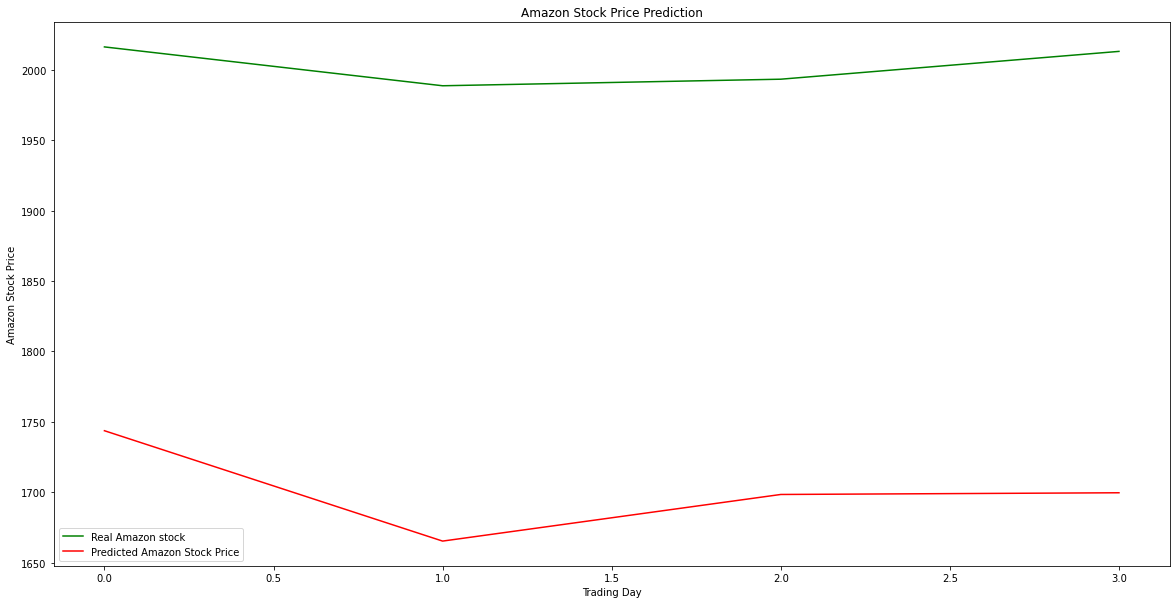

In [84]:
#HIGH
plt.figure(figsize=(20,10))
plt.plot(target_set_test[0], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[0], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

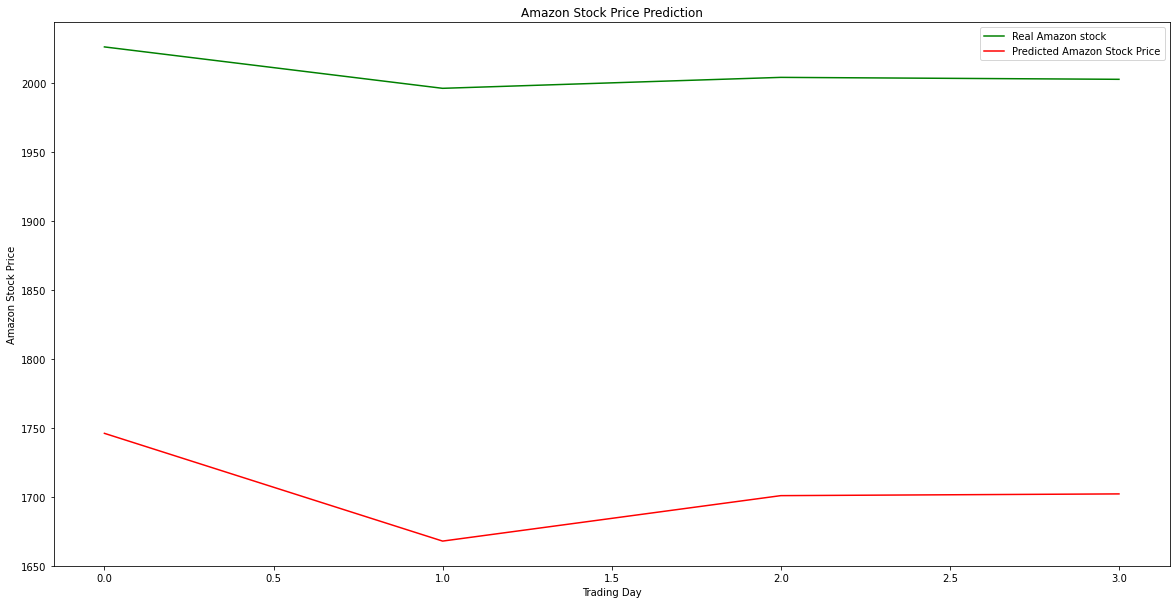

In [85]:
#LOW
plt.figure(figsize=(20,10))
plt.plot(target_set_test[1], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[1], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

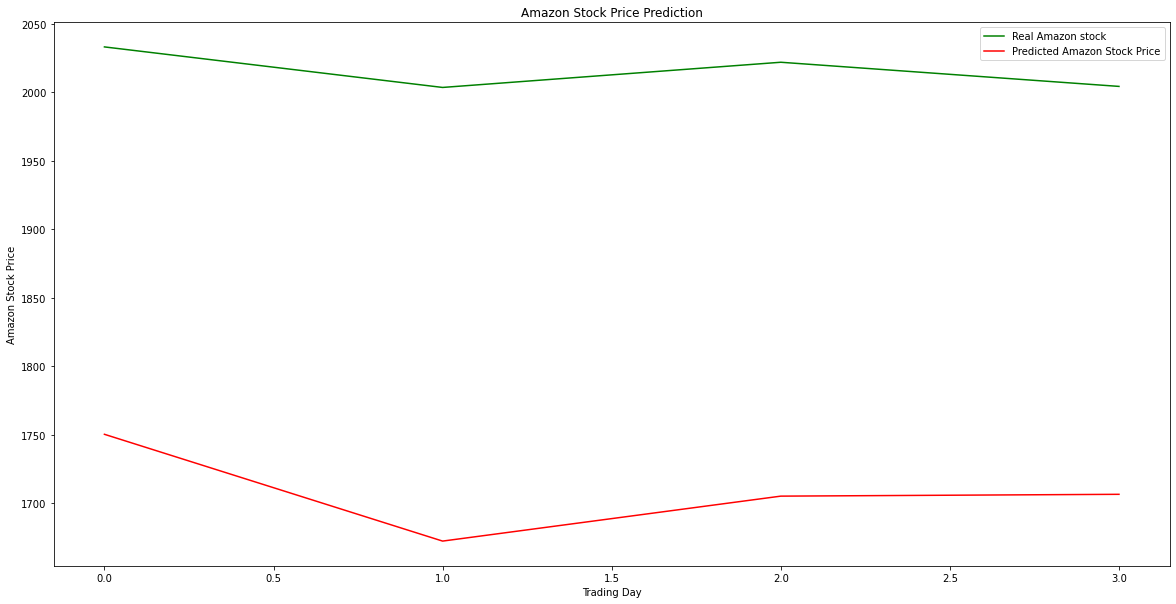

In [86]:
# OPEN
plt.figure(figsize=(20,10))
plt.plot(target_set_test[2], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[2], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

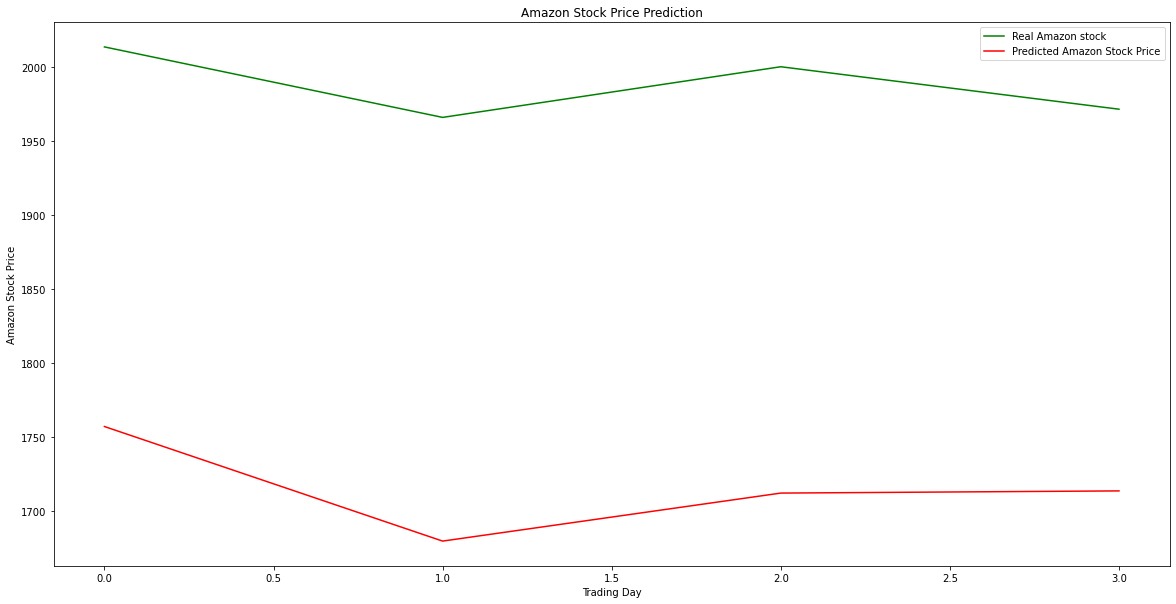

In [87]:
#CLOSE
plt.figure(figsize=(20,10))
plt.plot(target_set_test[3], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[3], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

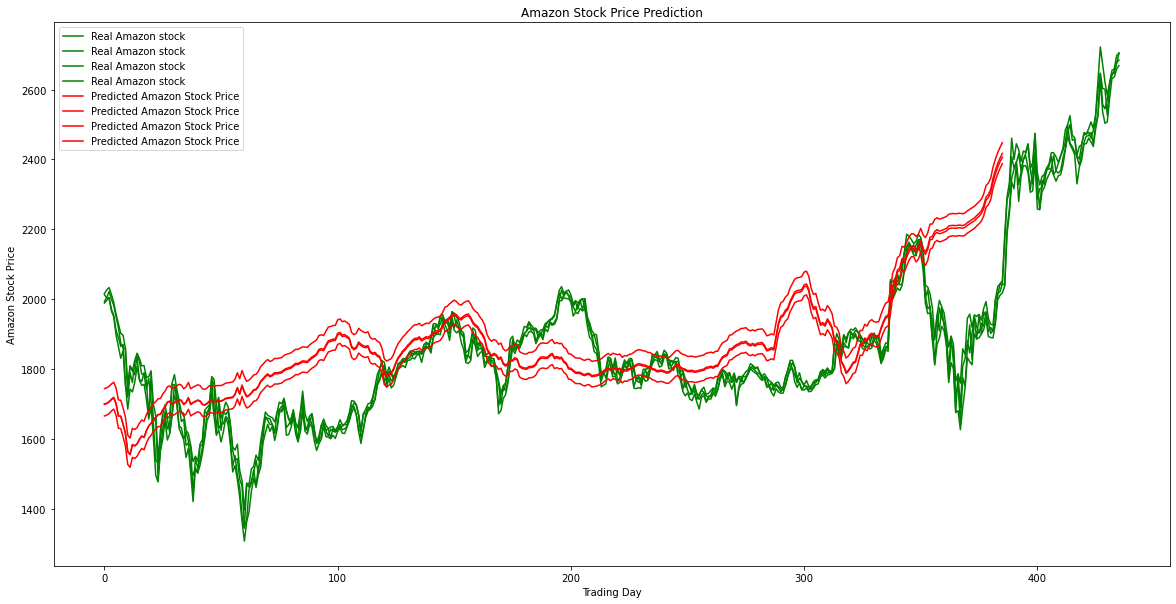

In [88]:
### ALL OVER
plt.figure(figsize=(20,10))
plt.plot(target_set_test, color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

In [ ]:
### RNN COMPLETE

In [89]:
#COVERING ANN
import pandas as pd
df1=pd.read_csv("dataset_target_2.csv")
df2=pd.read_csv("dataset_target.csv")
df3=pd.read_csv('Dataset_main.csv')

In [90]:
df3.fillna(0, inplace=True)

In [91]:
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

In [92]:
col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [93]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)

In [94]:
Drop_cols=col_y

In [95]:
Drop_cols=Drop_cols.tolist()

In [96]:
Drop_cols.append('Date')

In [97]:
X_df=df3.drop(Drop_cols,axis=1)

In [98]:
X=X_df.values

In [99]:
saved_model_regressor=tf.keras.models.load_model('Regressor_model.h5')

In [100]:
Regressor_prediction=saved_model_regressor(X)

In [101]:
Regressor_prediction

<tf.Tensor: shape=(2636, 4), dtype=float32, numpy=
array([[ 142.74136 ,  139.69254 ,  140.3188  ,  141.5739  ],
       [ 113.436935,  110.77645 ,  111.38241 ,  112.414635],
       [ 125.441795,  122.62222 ,  123.2365  ,  124.36003 ],
       ...,
       [2680.172   , 2643.498   , 2645.883   , 2666.4373  ],
       [2708.4128  , 2671.3645  , 2673.7688  , 2694.5378  ],
       [2589.5593  , 2554.086   , 2556.408   , 2576.273   ]],
      dtype=float32)>

In [102]:
Regressor_prediction.shape

TensorShape([2636, 4])

In [103]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(Regressor_prediction)):
        y_pred_temp.append(Regressor_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    

In [104]:
y_pred_mod

[array([ 142.74136 ,  113.436935,  125.441795, ..., 2680.172   ,
        2708.4128  , 2589.5593  ], dtype=float32),
 array([ 139.69254,  110.77645,  122.62222, ..., 2643.498  , 2671.3645 ,
        2554.086  ], dtype=float32),
 array([ 140.3188 ,  111.38241,  123.2365 , ..., 2645.883  , 2673.7688 ,
        2556.408  ], dtype=float32),
 array([ 141.5739  ,  112.414635,  124.36003 , ..., 2666.4373  ,
        2694.5378  , 2576.273   ], dtype=float32)]

In [106]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_RNN','Low_RNN','Open_RNN','Close_RNN'])

In [109]:
Y_pred.head()

,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,142.741364,139.692535,140.318802,141.573898
1,113.436935,110.776451,111.382408,112.414635
2,125.441795,122.622223,123.236504,124.360031
3,155.078720,151.866394,152.501221,153.850159
4,105.722946,103.164688,103.765305,104.738853


In [110]:
Y_pred.to_csv('Regressor_results.csv',index=False)

In [111]:
df_main=df1.drop(['Date'],axis=1)

In [112]:
main_set=df_main.values

In [113]:
main_set_scaled = sc.transform(main_set)

ValueError: X has 9 features, but MinMaxScaler is expecting 4 features as input.

In [114]:
X_test = []

for i in range(50,len(main_set)):
    X_test.append(main_set[i-50:i,:])
    
X_test = np.array(X_test)

In [115]:
saved_model_RNN=tf.keras.models.load_model('RNN_model.h5')

In [116]:
RNN_prediction=RNN_model.predict(X_test)

81/81 [==============================] - 1s 15ms/step


In [117]:
len(RNN_prediction)

2586

In [118]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(RNN_prediction)):
        y_pred_temp.append(RNN_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))

In [120]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_RNN','Low_RNN','Open_RNN','Close_RNN'])

In [121]:
Y_pred.head()

,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,0.630981,0.629688,0.630177,0.627307
1,0.354991,0.357067,0.356337,0.354364
2,0.358644,0.360979,0.359920,0.358070
3,0.401104,0.402780,0.402107,0.400162
4,0.402488,0.405229,0.403922,0.402043


In [122]:
Y_pred.to_csv('RNN_results.csv',index=False)

In [123]:
df1=pd.read_csv('Regressor_results.csv')
df2=pd.read_csv('RNN_results.csv')

In [124]:
df1=df1[50:]
df1.to_csv('Regressor_results_mod.csv',index=False)

In [125]:
df1=pd.read_csv('Regressor_results_mod.csv')

In [126]:
df=pd.concat([df1,df2],axis=1)

In [127]:
df.head()

,High_RNN,Low_RNN,Open_RNN,Close_RNN,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,162.036820,158.73228,159.37193,160.77379,0.630981,0.629688,0.630177,0.627307
1,134.456820,131.51778,132.13830,133.33040,0.354991,0.357067,0.356337,0.354364
2,127.780365,124.92980,125.54570,126.68701,0.358644,0.360979,0.359920,0.358070
3,105.899550,103.33894,103.93968,104.91457,0.401104,0.402780,0.402107,0.400162
4,178.655750,175.13100,175.78215,177.31041,0.402488,0.405229,0.403922,0.402043


In [128]:
df1=pd.read_csv("dataset_target_2.csv")

In [131]:
target_high=[]
target_low=[]
i=50
while i<len(df1):
    target_high.append(df1.iloc[i]['High'])
    target_low.append(df1.iloc[i]['Low'])
    i+=1

In [133]:
len(target_high)

2586

In [134]:
df['Target_high']=target_high
df['Target_low']=target_low

df.to_csv('feature.csv',index=False)

In [135]:
df_main=pd.read_csv('feature.csv')

In [136]:
print(df_main.head())

     High_RNN    Low_RNN   Open_RNN  Close_RNN  High_RNN.1  Low_RNN.1  \
0  162.036820  158.73228  159.37193  160.77379    0.630981   0.629688   
1  134.456820  131.51778  132.13830  133.33040    0.354991   0.357067   
2  127.780365  124.92980  125.54570  126.68701    0.358644   0.360979   
3  105.899550  103.33894  103.93968  104.91457    0.401104   0.402780   
4  178.655750  175.13100  175.78215  177.31041    0.402488   0.405229   

   Open_RNN.1  Close_RNN.1  Target_high  Target_low  
0    0.630177     0.627307   132.289993  130.500000  
1    0.356337     0.354364   132.690002  131.220001  
2    0.359920     0.358070   132.850006  130.440002  
3    0.402107     0.400162   133.710007  129.660004  
4    0.403922     0.402043   130.960007  128.639999  


In [138]:
X_Df=df_main[['High_RNN','Low_RNN','Open_RNN','Close_RNN','High_RNN.1','Low_RNN.1','Open_RNN.1','Close_RNN.1']].values


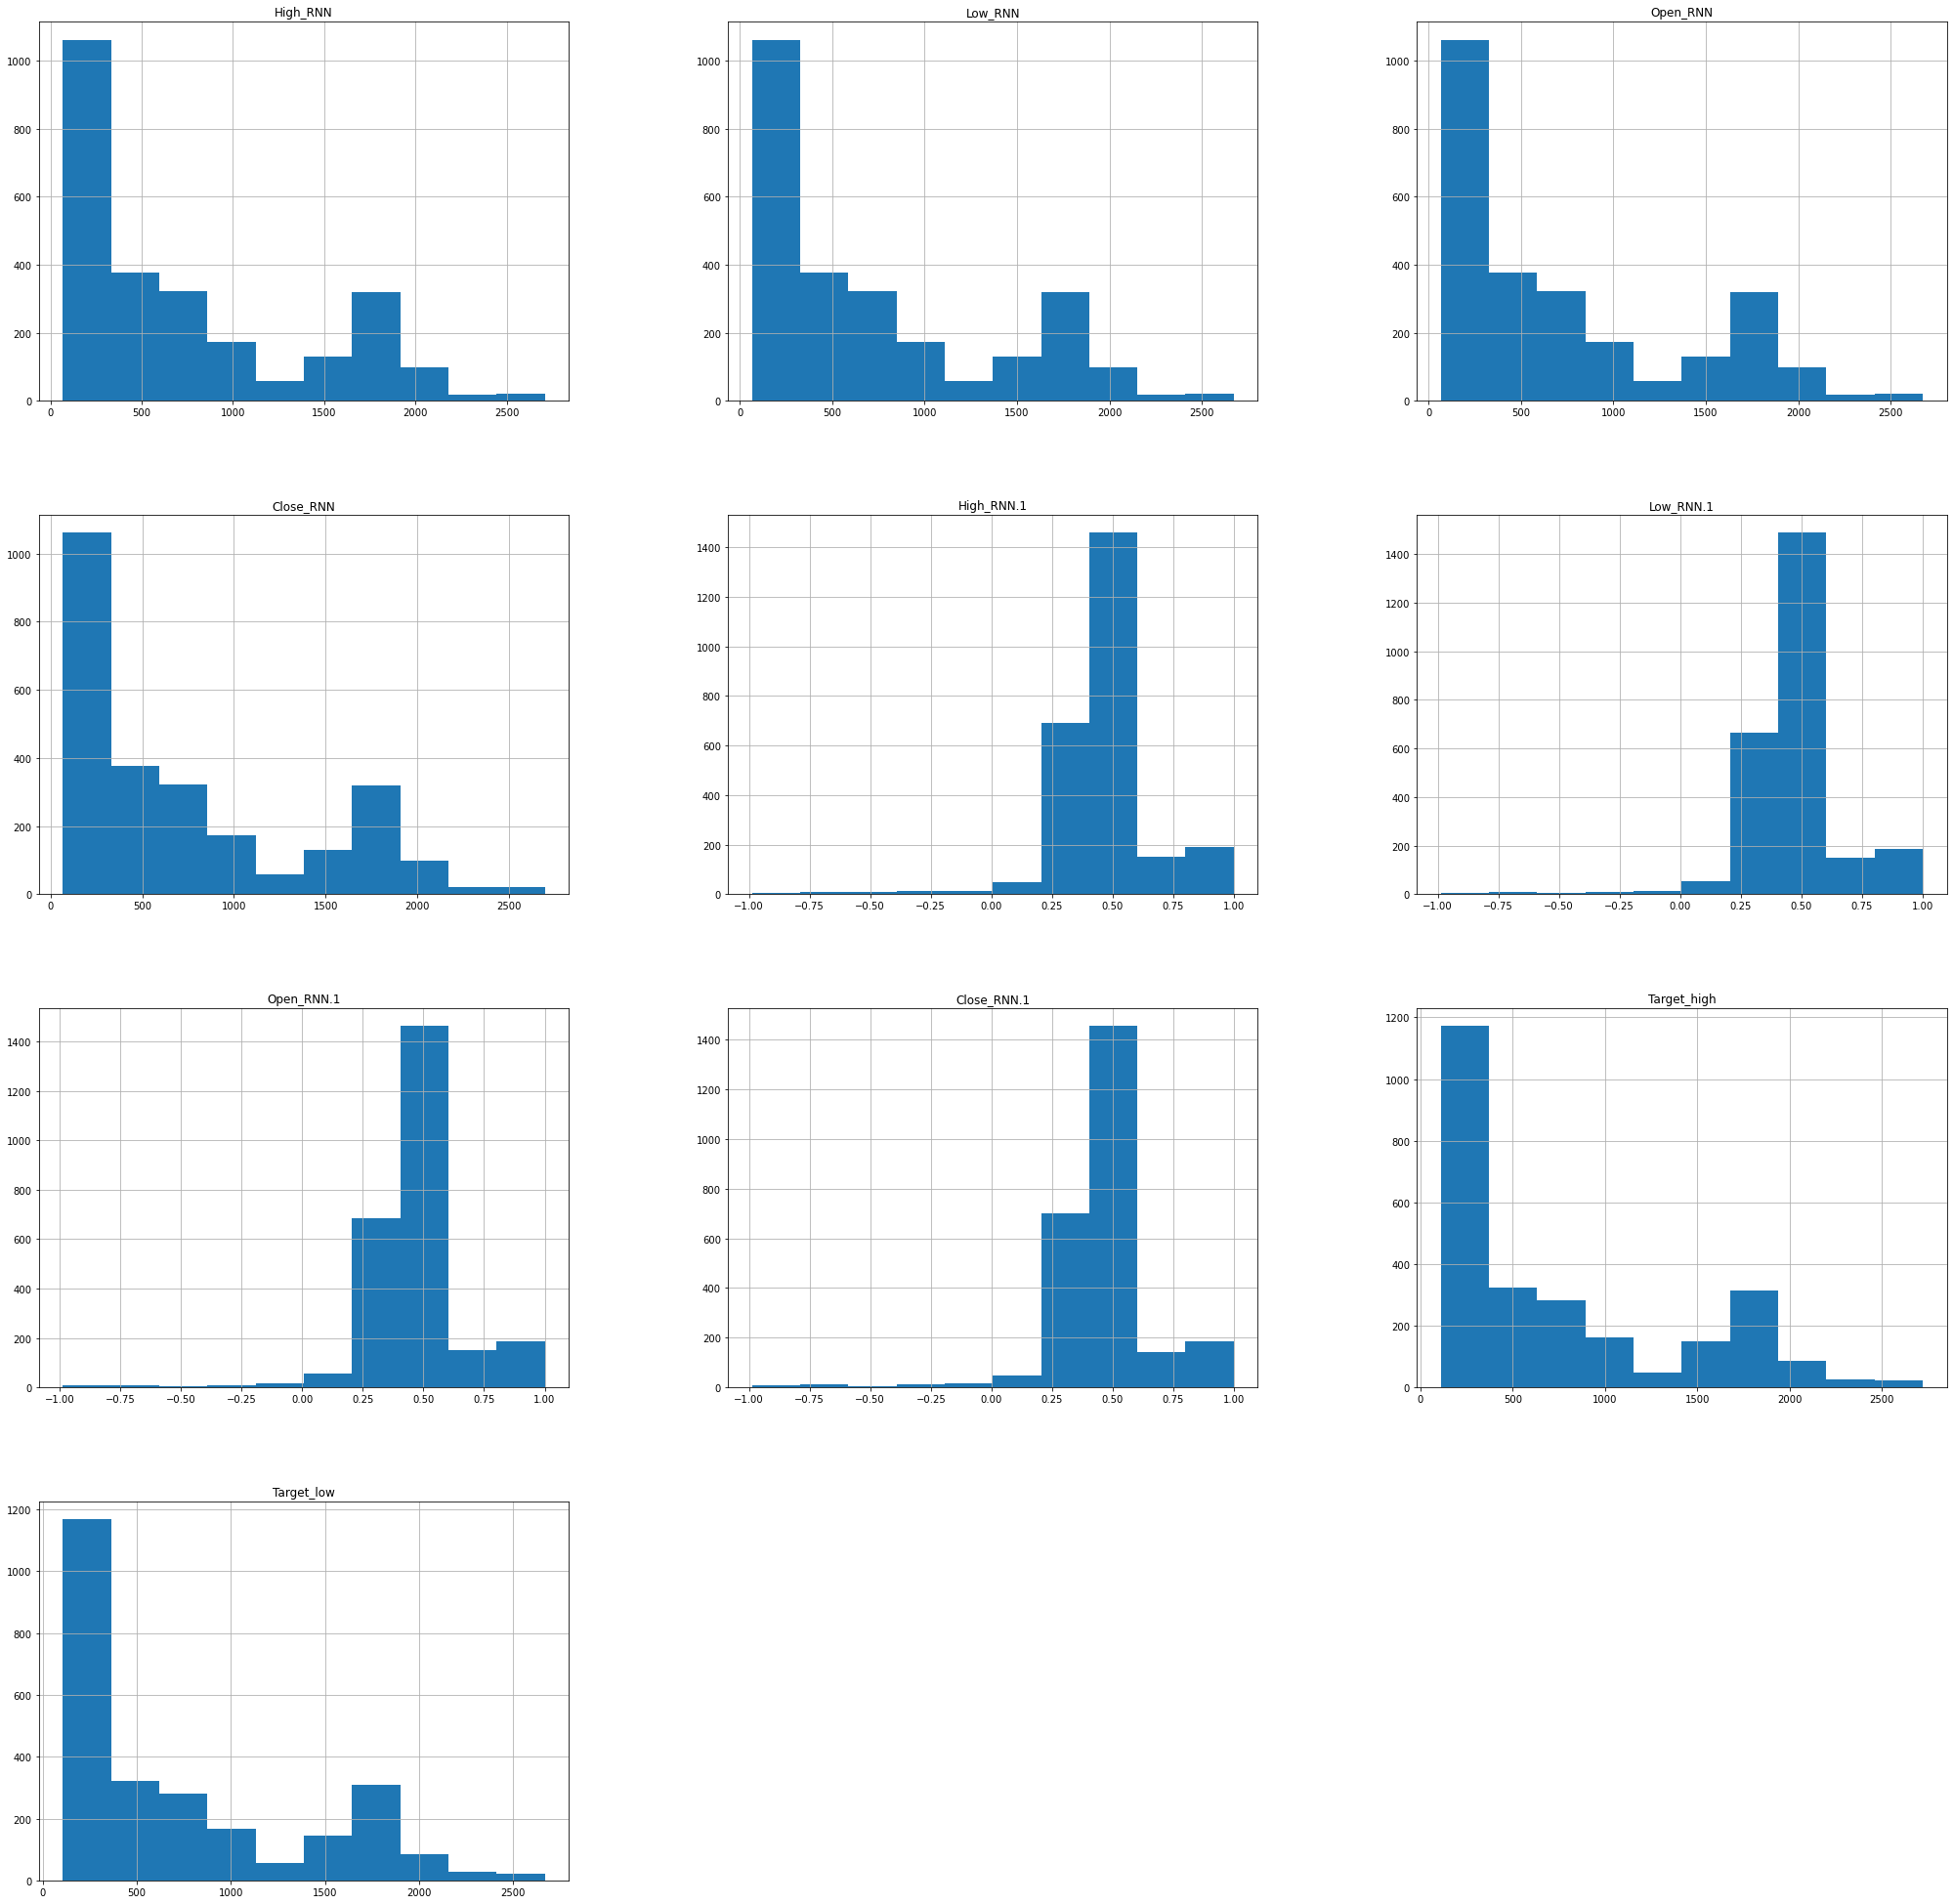

In [139]:
df_main.hist(figsize = (35,35))
plt.show()

In [140]:
y_Df=df_main[['Target_high','Target_low']].values

In [141]:
sc_2 = MinMaxScaler(feature_range = (0, 1))

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Df, y_Df, test_size=0.3)

In [143]:
X_train_scaled=sc_2.fit_transform(X_train)

In [144]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 8, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(2, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [145]:
import tensorflow as tf
model_ANN=model()
callback=tf.keras.callbacks.ModelCheckpoint(filepath='ANN_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=model_ANN.fit(X_train,y_train, epochs = 1000, batch_size = 32,callbacks=[callback])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                288       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
Total params: 10,978
Trainable params: 10,978
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
57/57 [==============================] - 1s 2ms/step - loss: 454.9106 - accuracy: 1.0000 - mean_absolute_error: 454.9106
Epoch 2/1000
57/57 [============================

57/57 [==============================] - 0s 1ms/step - loss: 27.8093 - accuracy: 1.0000 - mean_absolute_error: 27.8093
Epoch 56/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.6217 - accuracy: 1.0000 - mean_absolute_error: 29.6217
Epoch 57/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.1831 - accuracy: 1.0000 - mean_absolute_error: 29.1831
Epoch 58/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.5831 - accuracy: 1.0000 - mean_absolute_error: 28.5831
Epoch 59/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.4109 - accuracy: 1.0000 - mean_absolute_error: 28.4109
Epoch 60/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.3401 - accuracy: 1.0000 - mean_absolute_error: 28.3401
Epoch 61/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.2588 - accuracy: 1.0000 - mean_absolute_error: 28.2588
Epoch 62/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.1851 

57/57 [==============================] - 0s 1ms/step - loss: 28.9457 - accuracy: 1.0000 - mean_absolute_error: 28.9457
Epoch 117/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.3842 - accuracy: 1.0000 - mean_absolute_error: 28.3842
Epoch 118/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.8309 - accuracy: 1.0000 - mean_absolute_error: 27.8309
Epoch 119/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.5440 - accuracy: 1.0000 - mean_absolute_error: 27.5440
Epoch 120/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.4462 - accuracy: 1.0000 - mean_absolute_error: 27.4462
Epoch 121/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.9158 - accuracy: 1.0000 - mean_absolute_error: 27.9158
Epoch 122/1000
57/57 [==============================] - 0s 2ms/step - loss: 29.0582 - accuracy: 1.0000 - mean_absolute_error: 29.0582
Epoch 123/1000
57/57 [==============================] - 0s 2ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 28.0462 - accuracy: 1.0000 - mean_absolute_error: 28.0462
Epoch 178/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.8227 - accuracy: 1.0000 - mean_absolute_error: 28.8227
Epoch 179/1000
57/57 [==============================] - 0s 1ms/step - loss: 30.6357 - accuracy: 1.0000 - mean_absolute_error: 30.6357
Epoch 180/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.6776 - accuracy: 1.0000 - mean_absolute_error: 27.6776
Epoch 181/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.5446 - accuracy: 1.0000 - mean_absolute_error: 27.5446
Epoch 182/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.4483 - accuracy: 1.0000 - mean_absolute_error: 29.4483
Epoch 183/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.0995 - accuracy: 1.0000 - mean_absolute_error: 29.0995
Epoch 184/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 2ms/step - loss: 28.3456 - accuracy: 1.0000 - mean_absolute_error: 28.3456
Epoch 239/1000
57/57 [==============================] - 0s 2ms/step - loss: 28.5675 - accuracy: 1.0000 - mean_absolute_error: 28.5675
Epoch 240/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.6748 - accuracy: 1.0000 - mean_absolute_error: 27.6748
Epoch 241/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.2494 - accuracy: 1.0000 - mean_absolute_error: 27.2494
Epoch 242/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.2036 - accuracy: 1.0000 - mean_absolute_error: 27.2036
Epoch 243/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.2163 - accuracy: 1.0000 - mean_absolute_error: 27.2163
Epoch 244/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.1879 - accuracy: 1.0000 - mean_absolute_error: 27.1879
Epoch 245/1000
57/57 [==============================] - 0s 2ms/step - loss: 2

57/57 [==============================] - 0s 2ms/step - loss: 28.6722 - accuracy: 1.0000 - mean_absolute_error: 28.6722
Epoch 300/1000
57/57 [==============================] - 0s 2ms/step - loss: 31.3410 - accuracy: 1.0000 - mean_absolute_error: 31.3410
Epoch 301/1000
57/57 [==============================] - 0s 2ms/step - loss: 29.5364 - accuracy: 1.0000 - mean_absolute_error: 29.5364
Epoch 302/1000
57/57 [==============================] - 0s 2ms/step - loss: 29.4008 - accuracy: 1.0000 - mean_absolute_error: 29.4008
Epoch 303/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.9054 - accuracy: 1.0000 - mean_absolute_error: 27.9054
Epoch 304/1000
57/57 [==============================] - 0s 2ms/step - loss: 28.2066 - accuracy: 1.0000 - mean_absolute_error: 28.2066
Epoch 305/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.5804 - accuracy: 1.0000 - mean_absolute_error: 27.5804
Epoch 306/1000
57/57 [==============================] - 0s 2ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.7253 - accuracy: 1.0000 - mean_absolute_error: 27.7253
Epoch 361/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.7007 - accuracy: 1.0000 - mean_absolute_error: 27.7007
Epoch 362/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.4915 - accuracy: 1.0000 - mean_absolute_error: 27.4915
Epoch 363/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.5200 - accuracy: 1.0000 - mean_absolute_error: 27.5200
Epoch 364/1000
57/57 [==============================] - 0s 2ms/step - loss: 29.0030 - accuracy: 1.0000 - mean_absolute_error: 29.0030
Epoch 365/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.3713 - accuracy: 1.0000 - mean_absolute_error: 27.3713
Epoch 366/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.2952 - accuracy: 1.0000 - mean_absolute_error: 27.2952
Epoch 367/1000
57/57 [==============================] - 0s 2ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.5691 - accuracy: 1.0000 - mean_absolute_error: 27.5691
Epoch 422/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.9676 - accuracy: 1.0000 - mean_absolute_error: 29.9676
Epoch 423/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.9569 - accuracy: 1.0000 - mean_absolute_error: 29.9569
Epoch 424/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.1042 - accuracy: 1.0000 - mean_absolute_error: 28.1042
Epoch 425/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.8417 - accuracy: 1.0000 - mean_absolute_error: 29.8417
Epoch 426/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.0528 - accuracy: 1.0000 - mean_absolute_error: 28.0528
Epoch 427/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.9449 - accuracy: 1.0000 - mean_absolute_error: 27.9449
Epoch 428/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 29.0995 - accuracy: 1.0000 - mean_absolute_error: 29.0995
Epoch 483/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.6914 - accuracy: 1.0000 - mean_absolute_error: 27.6914
Epoch 484/1000
57/57 [==============================] - 0s 1ms/step - loss: 30.9990 - accuracy: 1.0000 - mean_absolute_error: 30.9990
Epoch 485/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.7723 - accuracy: 1.0000 - mean_absolute_error: 27.7723
Epoch 486/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.7839 - accuracy: 1.0000 - mean_absolute_error: 27.7839
Epoch 487/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.0934 - accuracy: 1.0000 - mean_absolute_error: 28.0934
Epoch 488/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.2774 - accuracy: 1.0000 - mean_absolute_error: 27.2774
Epoch 489/1000
57/57 [==============================] - 0s 2ms/step - loss: 2

57/57 [==============================] - 0s 2ms/step - loss: 28.0177 - accuracy: 1.0000 - mean_absolute_error: 28.0177
Epoch 544/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.9957 - accuracy: 1.0000 - mean_absolute_error: 27.9957
Epoch 545/1000
57/57 [==============================] - 0s 2ms/step - loss: 28.1158 - accuracy: 1.0000 - mean_absolute_error: 28.1158
Epoch 546/1000
57/57 [==============================] - 0s 2ms/step - loss: 27.6826 - accuracy: 1.0000 - mean_absolute_error: 27.6826
Epoch 547/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.4874 - accuracy: 1.0000 - mean_absolute_error: 27.4874
Epoch 548/1000
57/57 [==============================] - 0s 2ms/step - loss: 28.1730 - accuracy: 1.0000 - mean_absolute_error: 28.1730
Epoch 549/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.8106 - accuracy: 1.0000 - mean_absolute_error: 27.8106
Epoch 550/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.6273 - accuracy: 1.0000 - mean_absolute_error: 27.6273
Epoch 605/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.0256 - accuracy: 1.0000 - mean_absolute_error: 29.0256
Epoch 606/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.7419 - accuracy: 1.0000 - mean_absolute_error: 29.7419
Epoch 607/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.5047 - accuracy: 1.0000 - mean_absolute_error: 28.5047
Epoch 608/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.6872 - accuracy: 1.0000 - mean_absolute_error: 27.6872
Epoch 609/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.0978 - accuracy: 1.0000 - mean_absolute_error: 28.0978
Epoch 610/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.8431 - accuracy: 1.0000 - mean_absolute_error: 27.8431
Epoch 611/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.1533 - accuracy: 1.0000 - mean_absolute_error: 27.1533
Epoch 666/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.0552 - accuracy: 1.0000 - mean_absolute_error: 27.0552
Epoch 667/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.9424 - accuracy: 1.0000 - mean_absolute_error: 28.9424
Epoch 668/1000
57/57 [==============================] - 0s 2ms/step - loss: 26.7829 - accuracy: 1.0000 - mean_absolute_error: 26.7829
Epoch 669/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.4215 - accuracy: 1.0000 - mean_absolute_error: 27.4215
Epoch 670/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.7362 - accuracy: 1.0000 - mean_absolute_error: 27.7362
Epoch 671/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.2763 - accuracy: 1.0000 - mean_absolute_error: 27.2763
Epoch 672/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 29.1928 - accuracy: 1.0000 - mean_absolute_error: 29.1928
Epoch 727/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.0967 - accuracy: 1.0000 - mean_absolute_error: 27.0967
Epoch 728/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.1943 - accuracy: 1.0000 - mean_absolute_error: 27.1943
Epoch 729/1000
57/57 [==============================] - 0s 1ms/step - loss: 26.9921 - accuracy: 1.0000 - mean_absolute_error: 26.9921
Epoch 730/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.5324 - accuracy: 1.0000 - mean_absolute_error: 27.5324
Epoch 731/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.7845 - accuracy: 1.0000 - mean_absolute_error: 27.7845
Epoch 732/1000
57/57 [==============================] - 0s 1ms/step - loss: 26.8663 - accuracy: 1.0000 - mean_absolute_error: 26.8663
Epoch 733/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.6164 - accuracy: 1.0000 - mean_absolute_error: 27.6164
Epoch 788/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.5962 - accuracy: 1.0000 - mean_absolute_error: 27.5962
Epoch 789/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.2681 - accuracy: 1.0000 - mean_absolute_error: 27.2681
Epoch 790/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.7377 - accuracy: 1.0000 - mean_absolute_error: 28.7377
Epoch 791/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.9692 - accuracy: 1.0000 - mean_absolute_error: 27.9692
Epoch 792/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.9832 - accuracy: 1.0000 - mean_absolute_error: 27.9832
Epoch 793/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.0668 - accuracy: 1.0000 - mean_absolute_error: 27.0668
Epoch 794/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.5957 - accuracy: 1.0000 - mean_absolute_error: 27.5957
Epoch 849/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.8114 - accuracy: 1.0000 - mean_absolute_error: 27.8114
Epoch 850/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.5205 - accuracy: 1.0000 - mean_absolute_error: 28.5205
Epoch 851/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.1969 - accuracy: 1.0000 - mean_absolute_error: 27.1969
Epoch 852/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.5995 - accuracy: 1.0000 - mean_absolute_error: 27.5995
Epoch 853/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.7252 - accuracy: 1.0000 - mean_absolute_error: 27.7252
Epoch 854/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.1202 - accuracy: 1.0000 - mean_absolute_error: 28.1202
Epoch 855/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.1468 - accuracy: 1.0000 - mean_absolute_error: 27.1468
Epoch 910/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.9641 - accuracy: 1.0000 - mean_absolute_error: 27.9641
Epoch 911/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.8985 - accuracy: 1.0000 - mean_absolute_error: 27.8985
Epoch 912/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.4639 - accuracy: 1.0000 - mean_absolute_error: 27.4639
Epoch 913/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.7560 - accuracy: 1.0000 - mean_absolute_error: 27.7560
Epoch 914/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.9827 - accuracy: 1.0000 - mean_absolute_error: 27.9827
Epoch 915/1000
57/57 [==============================] - 0s 1ms/step - loss: 28.1510 - accuracy: 1.0000 - mean_absolute_error: 28.1510
Epoch 916/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

57/57 [==============================] - 0s 1ms/step - loss: 27.1667 - accuracy: 1.0000 - mean_absolute_error: 27.1667
Epoch 971/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.3933 - accuracy: 1.0000 - mean_absolute_error: 27.3933
Epoch 972/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.6626 - accuracy: 1.0000 - mean_absolute_error: 27.6626
Epoch 973/1000
57/57 [==============================] - 0s 1ms/step - loss: 29.5988 - accuracy: 1.0000 - mean_absolute_error: 29.5988
Epoch 974/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.1407 - accuracy: 1.0000 - mean_absolute_error: 27.1407
Epoch 975/1000
57/57 [==============================] - 0s 1ms/step - loss: 26.8399 - accuracy: 1.0000 - mean_absolute_error: 26.8399
Epoch 976/1000
57/57 [==============================] - 0s 1ms/step - loss: 27.1992 - accuracy: 1.0000 - mean_absolute_error: 27.1992
Epoch 977/1000
57/57 [==============================] - 0s 1ms/step - loss: 2

In [146]:
X_test_scaled=sc_2.transform(X_test)

In [147]:
y_pred=model_ANN.predict(X_test)

25/25 [==============================] - 0s 1ms/step


In [148]:
y_pred

array([[ 318.88113,  312.186  ],
       [1803.562  , 1770.0409 ],
       [ 374.02484,  366.33484],
       ...,
       [1964.1748 , 1927.7518 ],
       [ 215.74467,  210.91437],
       [ 225.5151 ,  220.50679]], dtype=float32)

In [149]:
y_test

array([[ 313.20001221,  303.47000122],
       [1713.75      , 1700.11999512],
       [ 365.        ,  359.3500061 ],
       ...,
       [2071.02001953, 2032.        ],
       [ 218.3999939 ,  205.75      ],
       [ 226.        ,  218.08999634]])

In [150]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,2):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

In [151]:
df_res=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_test_mod[0],y_test_mod[1])),columns=['Pred_high','Pred_low','Actual_high','Actual_low'])

In [152]:
df_res.head()

,Pred_high,Pred_low,Actual_high,Actual_low
0,318.881134,312.186005,313.200012,303.470001
1,1803.562012,1770.040894,1713.750000,1700.119995
2,374.024841,366.334839,365.000000,359.350006
3,200.318954,195.765839,183.500000,178.039993
4,2006.495605,1969.308716,1955.000000,1900.339966


In [155]:
df_res.to_csv('Results.csv',index=False)

In [156]:
df_res_2=df_res[500:600]

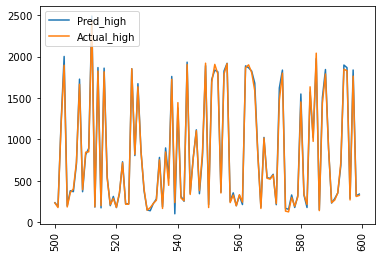

In [157]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_high'], label="Pred_high")
ax1.plot(df_res_2.index, df_res_2['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

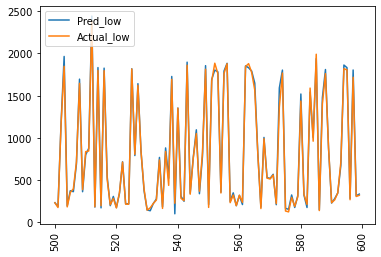

In [158]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_low'], label="Pred_low")
ax1.plot(df_res_2.index, df_res_2['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

In [159]:
df_res_2=df_res[200:300]

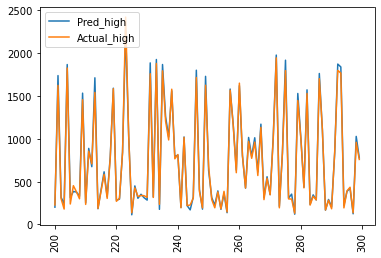

In [160]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_high'], label="Pred_high")
ax1.plot(df_res_2.index, df_res_2['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

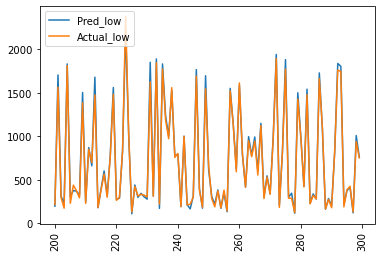

In [161]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_low'], label="Pred_low")
ax1.plot(df_res_2.index, df_res_2['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

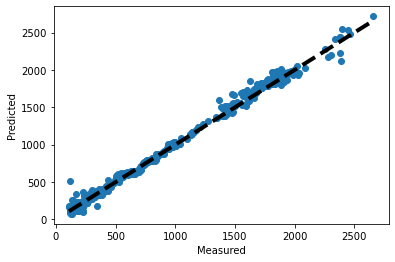

In [162]:
#low ann
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

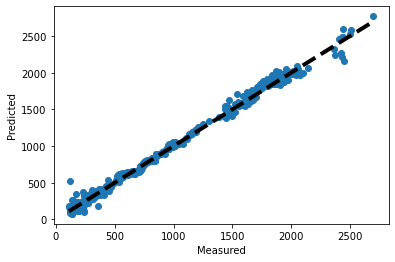

In [163]:
#high_ann
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()